# PCA Eigen-Faces and Facial Recognition
Facial recognition analysis with PCA and Machine Learning Models by Jaume Clave  
May 15th, 2020

In the 1960s, Woody Bledose, Helen Chan and Charles Bisson, worked on using a computer to recognize a set of human faces. The problem was to select from the database (a book of mug shots) a small set of records such that one of the image records matched the photograph. The recognition problem was made difficult by the great variability in heard rotation, tilt, lighting intensity and angle, facial expression, age of subject to name a few. Their approach involved manually marking various landmarks on the face such as eye centers, mouth and nose. These features were then mathematically rotated by the computer to compensate for pose variation. The distance between the landmarks were computed and compared between image and identity in order to output a result. The funding for this project was provided by an unnamed intelligence agency that did not allow much publicity, little of the work was published. 

Since then the technology powering facial recognition software has spread throughout our entire society. Social media platforms have adopted facial recognition capabilities to diversify their functionalities in order to attract a wider user base amidst stiff competition from different applications. Filters and animated lenses continue to have success for SnapChat and Instagram. Mobile phones themselves are now unlocked using some sort of facial verification of their user. Apple introduced Face ID on the flagship iPhone X as a biometric authentication successor to the Touch ID, a fingerprint based system. Face ID has a facial recognition sensor that consists of two parts: a "Romeo" module that projects more than 30,000 infrared dots onto the user's face, and a "Juliet" module that reads the pattern. The pattern is sent to a local "Secure Enclave" in the device's central processing unit (CPU) to confirm a match with the phone owner's face.

The technology is of course present in government and military. The U.S. Department of State operates one of the largest face recognition systems in the world with a database of 117 million American adults, with photos typically drawn from driver's license photos. The FBI has also instituted its Next Generation Identification program to include face recognition, as well as more traditional biometrics like fingerprints and iris scans, which can pull from both criminal and civil databases. As of late 2017, China has deployed facial recognition and artificial intelligence technology in Xinjiang. In 2020, China provided a grant to develop facial recognition technology to identify people wearing surgical or dust masks by matching solely to eyes and foreheads.

This project explores the basics behind simple facial recognition models and builds various models that might be used for simple detection. The methods used to transform large images into smaller sizeable inputs for these models is explained, tested and mathematically expressed. The project continues on to use PCA and K-means cluster, another unsupervised machine learning model, to investigate how different values of $k$ for the K-means model impacts the outputs centroids and decision boundaries.


## Index
[Eigen-Faces](#Eigen-Faces)  
i. [Initial PCA](#Initial-PCA)  
ii. [When to Apply PCA](#When-to-Apply-PCA)  
iii. [2 Principal Components](#2-Principal-Components)  
iv. [95% of the Explained Variance](#95%-of-the-Explained-Variance)  
v. [3-Dimensional Reconstruction](#3-Dimensional-Reconstruction)  
vi. [10-Dimensional Reconstruction](#10-Dimensional-Reconstruction)  
vii. [25-Dimensional Reconstruction](#25-Dimensional-Reconstruction)  
viii. [50-Dimensional Reconstruction](#50-Dimensional-Reconstruction)  
ix. [200-Dimensional Reconstruction](#200-Dimensional-Reconstruction)  
x. [Mathematical Expression](#Mathematical-Expression)

[Machine Learning for Facial Recognition](#Machine-Learning-for-Facial-Recognition)  
i. [Model Hyperparameter Optimization](#Model-Hyperparameter-Optimization)    
ii. [Neural Networks](#Neural-Networks)  
iii. [Leave One Out (LOO) Cross Validation](#Leave-One-Out-(LOO)-Cross-Validation)  
iv. [Final Model: Radial Basis Function Support Vector Machine](#Final-Model:-Radial-Basis-Function-Support-Vector-Machine)  
v. [Visualising the Faces](#Visualising-the-Faces)

[KMeans Clustering & PCA](#KMeans-Clustering-&-PCA)  
i. [(Simulated Dataset with 20 observations in Each of Three Classes](#Simulated-Dataset-with-20-observations-in-Each-of-Three-Classes)  
ii. [Principal Component Analysis](#Principal-Component-Analysis)  
            [2 Most Important Principal Components](#2-Most-Important-Principal-Components)  
            [3 Most Important Principal Components](#3-Most-Important-Principal-Components)  
iii. [ KMeans Clustering:  𝐾=3](#KMeans-Clustering:-$K=3$)   
iv. [KMeans Clustering:  𝐾=2](#KMeans-Clustering:-$K=2$)  
v. [KMeans Clustering:  𝐾=4](#KMeans-Clustering:-$K=4$)  
vi. [KMeans Clustering on 2 Component PCA:  𝐾=3](#KMeans-Clustering-on-2-Component-PCA:-$K=3$)  
[Visualising the Clusters, Centroids and Boundaries](#Visualising-the-Clusters,-Centroids-and-Boundaries)  
vii. [KMeans Clustering on Scaled Data:  𝐾=3](#KMeans-Clustering-on-Scaled-Data:-$K=3$)  

[Conclusion](#Conclusion)

[Further Reading](#Further-Reading)


## Eigen-Faces
This dataset contains a set of face images taken between April 1992 and April 1994 at AT&T Laboratories Cambridge. The sklearn.datasets.fetch_olivetti_faces function is the data fetching / caching function that downloads the data archive from AT&T.

The dataset is described below:

There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).

The image is quantized to 256 grey levels and stored as unsigned 8-bit integers; the loader will convert these to floating point values on the interval [0, 1], which are easier to work with for many algorithms.

The “target” for this database is an integer from 0 to 39 indicating the identity of the person pictured; however, with only 10 examples per class, this relatively small dataset is more interesting from an unsupervised or semi-supervised perspective.

This section introduced Principal Component Analysis and computes it for various principal component values. At each step, the target faces are plotted in order to visualize the impact on utilizing more and more principal components.

In [53]:
## Import modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

In [54]:
## Import datasets  
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()

In [55]:
print(f"There are {len(np.unique(faces['target']))} unique faces (targets) in the dataset")
print(f"There are {len(faces['images'])} images in the dataset")
print(f"Each image is composed of {faces['images'].shape[1]} by {faces['images'].shape[2]} pixels")

There are 40 unique faces (targets) in the dataset
There are 400 images in the dataset
Each image is composed of 64 by 64 pixels


In [56]:
## Create variables
X = faces['data']
y = faces['images']

These four faces will be the study of this project. The goal is to use Principal Component Analysis to reconstruct these faces.  There will be k-dimensional reconstructions of them for k = 3, 10, 25 and 50. The image will become clearer and clearer as the k value for the k-dimensional reconstructions increases. The higher the value for k, the more explained variance can be attributed to the principal components hence, the clearer the face.

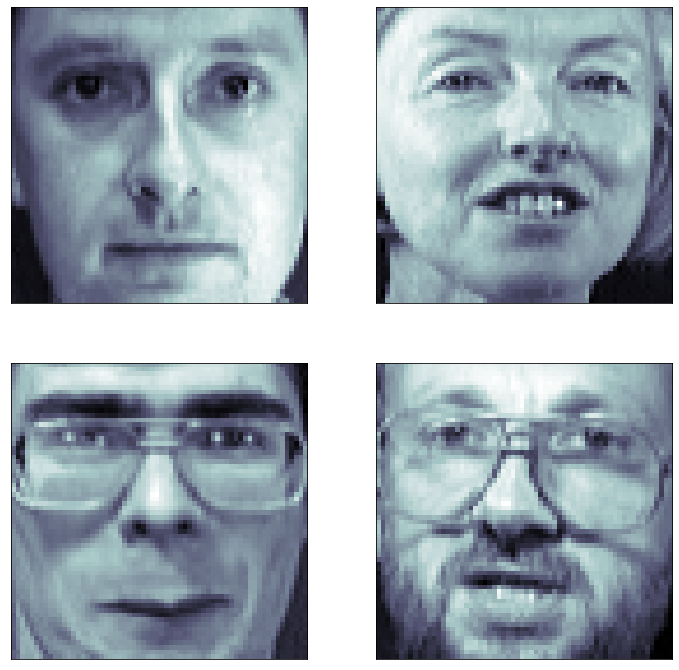

In [57]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (12, 12))

random.seed(9)
image_list = list()
# plot several images
for i in range(4):
    ax = fig.add_subplot(2, 2, i + 1, xticks = [], yticks  = [])
    i = random.randint(1 ,400)
    image_list.append(i)
    ax.imshow(faces['images'][i], cmap = plt.cm.bone)

### Initial PCA
Scikit-Learns PCA class uses SVD decomposition to implement principal component analysis. Below, the code applies PCA to reduce the dimensionality of the dataset to two dimensions.

Given a collection of points in two, three, or higher dimensional space, a "best fitting" line can be defined as one that minimizes the average squared distance from a point to the line. The next best-fitting line can similarly be chosen from directions perpendicular to the first. Repeating this process yields an orthogonal basis in which different individual dimensions of the data are uncorrelated. These basis vectors are called principal components, and several related procedures principal component analysis (PCA).

PCA helps reduce the dimensions of the feature space being examined. By reducing the dimension of the feature space, there are fewer relationships between variables to consider and the model is less likely to overfit. Reducing the dimension of the feature space is called **dimensionality reduction**. There are two main categories used to achieve dimensionality reduction:

        Feature Elimination: The feature space is reduced by eliminating features. The advantages of this include simplicity 
        and maintaining interpretability of the variables. However, because features are dropped there is no information 
        gain from those features and therefore eliminate the benefits those features might add to the model.
        
        Feature Extraction: "New" independent variables are created which formed from combinations of the original 
        independent variables. These new independent variables are created in a specific way and are ordered by how 
        well they are able to predict the dependent variable. The most important new independent variables are kept 
        and the least important ones are dropped. Because the new independent variables are combinations of the old 
        variables, the technique still keeps the valuable parts of the old variables.
        
Principal component analysis is a technique for **feature** extraction and it combines the input variables in a specific way, and drops the least important combination variables while retaining the most important ones. Each of the "new" variables after PCA are all independent from one another. This is a major benefit because of the assumptions of linear models which require the independent variables to be independent of one another.


### When to Apply PCA
PCA should not always be applied. In order to benefit from its use, various questions must be answered so that the user is sure PCA is a best-case use for the studied dataset:

        1. The number of variables want to be reduced, and it is difficult to identify variables (manually) to completely 
        remove from consideration
        
        2. The variables studied need to be independent from one another
        
        3. It is okay if the independent variables becomes less interpretable
        
If the situation at hand is okay with all three points above, especially point number 3, then it is advisable to begin the principal component analysis.

### 2 Principal Components
This section will create a 2-dimensional reconstruction of the dataset in order to find what percentage of the datasets variance lies along both the first and second principal component.

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [59]:
pca1_var = round(pca.explained_variance_ratio_[0] * 100, 2)
pca2_var = round(pca.explained_variance_ratio_[1] * 100, 2)

print(f'{pca1_var} % of the datasets variance lies along the first principal component (PC).')
print(f'{pca2_var} % of the datasets variance lies along the second principal component (PC).')
print(f'{100 - (pca1_var + pca2_var)} % of the datasets variance lies on the remaining PCs')

23.81 % of the datasets variance lies along the first principal component (PC).
13.99 % of the datasets variance lies along the second principal component (PC).
62.2 % of the datasets variance lies on the remaining PCs


### 95% of the Explained Variance  
Instead of arbitrarily choosing the number of PCA dimensions to reduce down to, it is simpler to choose the number of dimensions that add up to a sufficiently large portion of the variance.

In [60]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X)

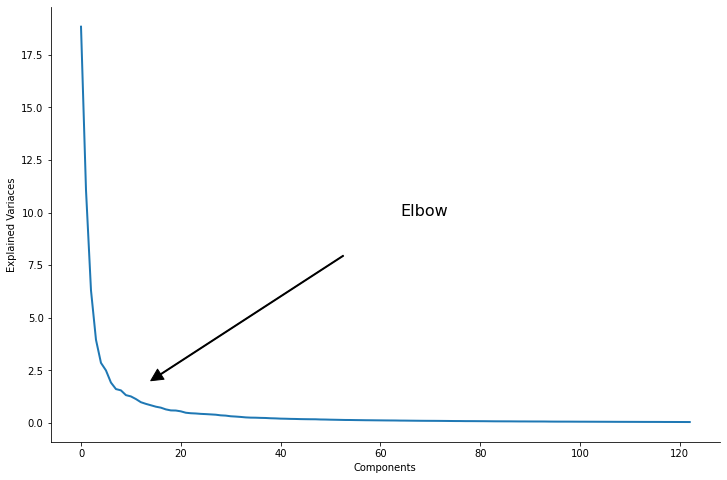

In [61]:
## Plotting
plt.figure(figsize = (12, 8))
plt.plot(pca.explained_variance_, linewidth = 2, color = '#1f78b4')
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.annotate(
    'Elbow', xy = (3, pca.explained_variance_[30]), xytext = (0.55, 0.55), textcoords = 'figure fraction', fontsize = 16,
    arrowprops = dict(facecolor = 'black', shrink = 0.18, width = 1)
             )
plt.show()

### Eigen-Faces
An eigen-face is the name given to a set of eigenvectors when used in computer vision problems of human face recognition. The eigenfaces themselves form a a basis set of all images used to construct the covariance matrix. This produces dimension reduction by allowing the smaller set of basis images to represent the original training images. Classification can be achieved by comparing how faces are represented by the basis set.

Using the reshape method, the reconstruction of the faces from __just__ the principal components analysis can be visualized. The first eigen-faces look the most like face and this is because these reconstructed faces are made from the principal components that explain the most variance in the data (face images). Like the "elbow" graph above, as the principal component number increases, the less explained variance each PC is responsible for. This is why it is becomes harder and harder to recognize that the image is a face as the visualization ends.

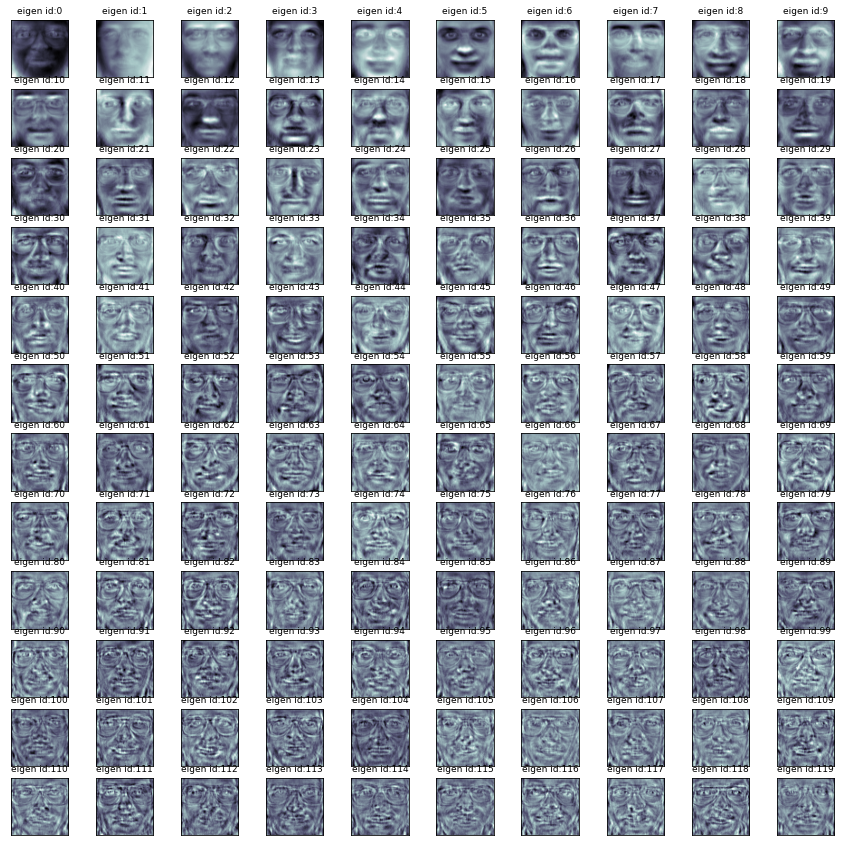

In [62]:
## Plotting all eigen faces
number_of_eigenfaces = len(pca.components_)
eigen_faces = pca.components_.reshape(number_of_eigenfaces, faces['images'].shape[1], faces['images'].shape[2])

cols = 10
rows = int(number_of_eigenfaces / cols)
fig, axarr = plt.subplots(nrows = rows, ncols = cols, figsize = (15, 15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    try:
        axarr[i].imshow(eigen_faces[i], cmap = "bone")
        axarr[i].set_xticks([])
        axarr[i].set_yticks([])
        axarr[i].set_title("eigen id:{}".format(i), size = 9)
    except:
        pass
    #plt.suptitle("All Eigen Faces")

By finding and displaying the mean of each PCA component the code below can demonstrate the "average" face in the dataset

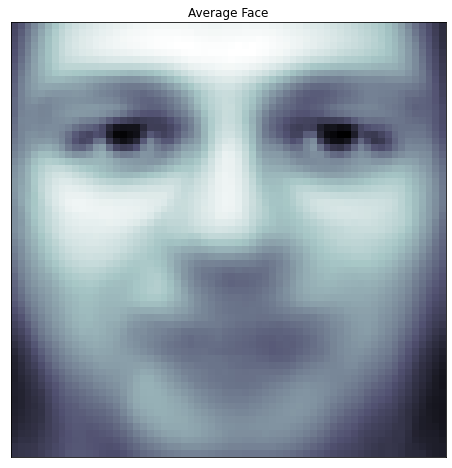

In [63]:
## Plot mean face
fig, ax=plt.subplots(figsize = (8, 8))
ax.imshow(pca.mean_.reshape((64, 64)), cmap = "bone")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')
plt.show()

### 3-Dimensional Reconstruction
This section uses 3 principal components to generate a 3-dimensional reconstruction of the faces.

In [64]:
## PCA
pca = PCA(n_components = 3)
transformed_data = pca.fit_transform(X)
print(f'The transformed data has {transformed_data.shape[0]} images and {transformed_data.shape[1]} PCA components')

The transformed data has 400 images and 3 PCA components


The output after pca.fit_transform is called the "loadings". Each sample has "loadings" which represent how much of each PCA component is needed to describe it best using a linear combination of the components.

The inverse transform method transforms the data back to its original space. It returns an input $X_{original}$ whose transform would be $X$.

In [65]:
x_approx = pca.inverse_transform(transformed_data)
print(f'The data has {x_approx.shape[0]} images and {x_approx.shape[1]} features. Just as many as the original dataset')

The data has 400 images and 4096 features. Just as many as the original dataset


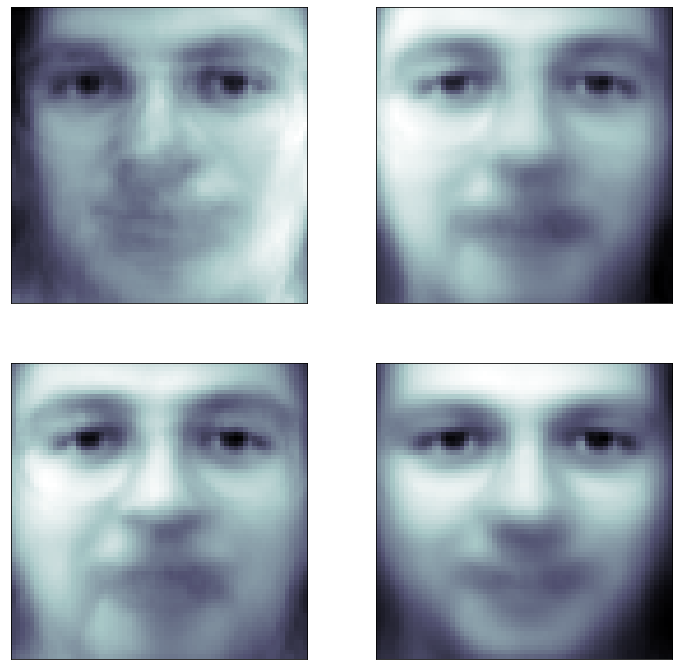

In [66]:
## Plotting K = 3
x_approx_img = x_approx.reshape(400, 64, 64)
fig = plt.figure(figsize = (12, 12))
for i in range(4):
    ax = fig.add_subplot(2, 2, i + 1, xticks = [], yticks  = [])
    i = image_list[i]
    ax.imshow(x_approx_img[i] , cmap = plt.cm.bone)
plt.show()

A function called image_decomposition is created to automatize the creation of the above visualizations for faster future analysis

In [67]:
def image_decomposition(data, n_components):
    pca = PCA(n_components = n_components)
    transformed_data = pca.fit_transform(X)
    x_approx = pca.inverse_transform(transformed_data)
    x_approx_img = x_approx.reshape(400, 64, 64)

    print(f'This is a {n_components} dimensional reconstruction of the original 4 images \n') 

    fig = plt.figure(figsize = (12, 12))
    plt.title(f'{n_components} Dimensional Reconstruction')
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')  
    plt.gca().spines['left'].set_color('none')
    plt.gca().spines['bottom'].set_color('none')  
    plt.xticks([])
    plt.yticks([])
    for i in range(4):
        ax = fig.add_subplot(2, 2, i + 1, xticks = [], yticks  = [])
        i = image_list[i]
        ax.imshow(x_approx_img[i] , cmap = 'bone')
    
     
    plt.show()

The woman’s face (top right) will be represented visually through a k-dimensional reconstruction of the k-component in the PCA analysis. The goal of these visualizations is to see how the face begins to evolve as more components are added.

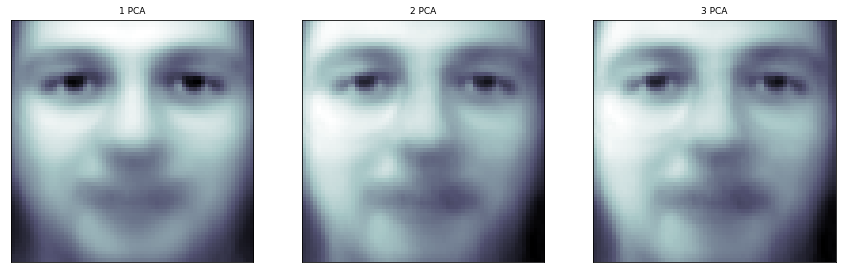

In [68]:
## Plotting reconstruction
fig = plt.figure(figsize = (20, 12))

K = 3

for comp in range(1, K + 1):
    ax = fig.add_subplot(1, K + 1, comp, xticks = [], yticks  = [])
    pca = PCA(n_components = comp)
    transformed_data = pca.fit_transform(X)
    x_approx = pca.inverse_transform(transformed_data)
    x_approx_img = x_approx.reshape(400, 64, 64)
    i = image_list[1]
    ax.imshow(x_approx_img[i] , cmap = plt.cm.bone)
    ax.set_title("{} PCA".format(comp), size = 9)

### 10-Dimensional Reconstruction
This section uses 10 principal components to generate a 10-dimensional reconstruction of the faces.

This is a 10 dimensional reconstruction of the original 4 images 



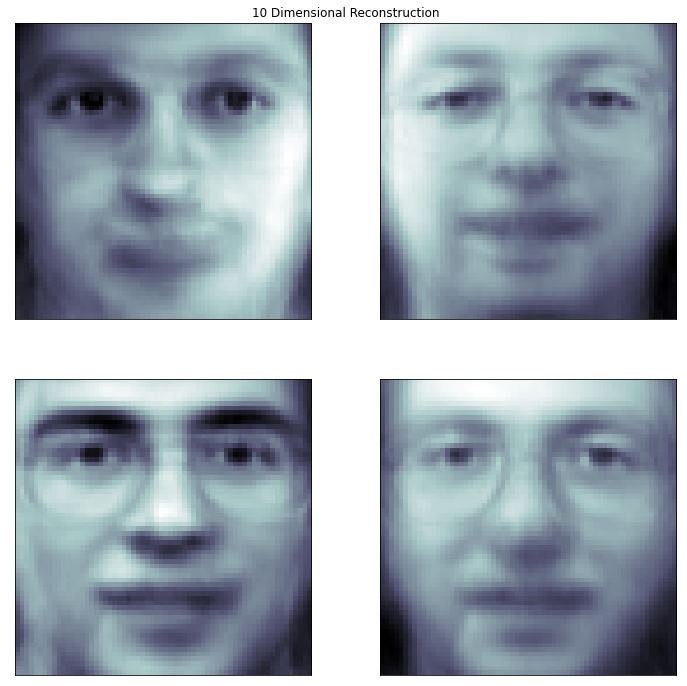

In [69]:
image_decomposition(X, 10)

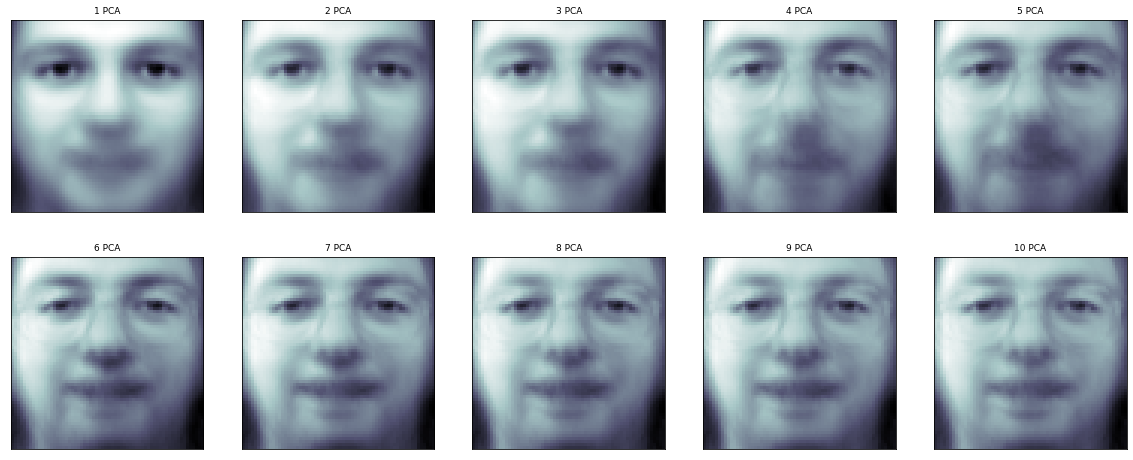

In [70]:
## Plotting reconstruction
fig = plt.figure(figsize = (20, 8))

K = 10

for comp in range(1, K + 1):
    ax = fig.add_subplot(2, 5, comp, xticks = [], yticks  = [])
    pca = PCA(n_components = comp)
    transformed_data = pca.fit_transform(X)
    x_approx = pca.inverse_transform(transformed_data)
    x_approx_img = x_approx.reshape(400, 64, 64)
    i = image_list[1]
    ax.imshow(x_approx_img[i] , cmap = plt.cm.bone)
    ax.set_title("{} PCA".format(comp), size = 9)

### 25-Dimensional Reconstruction
This section uses 25 principal components to generate a 25-dimensional reconstruction of the faces.

This is a 25 dimensional reconstruction of the original 4 images 



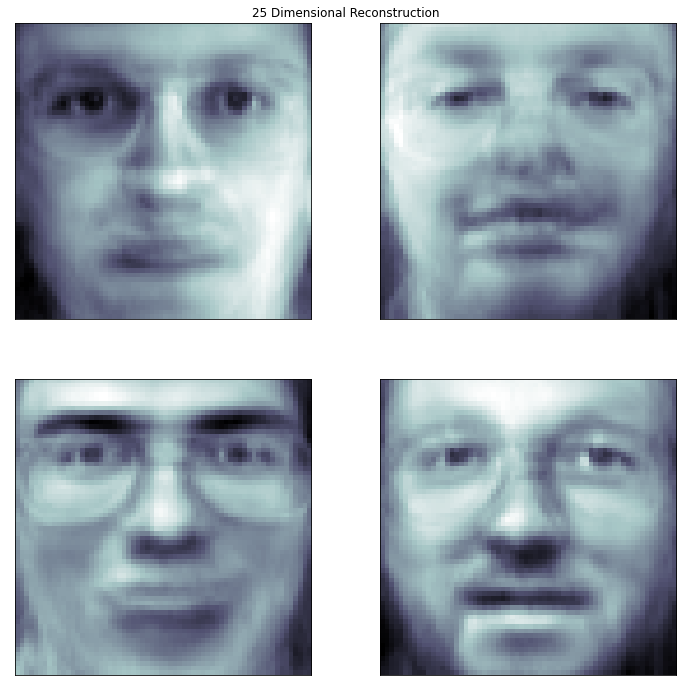

In [71]:
image_decomposition(X, 25)

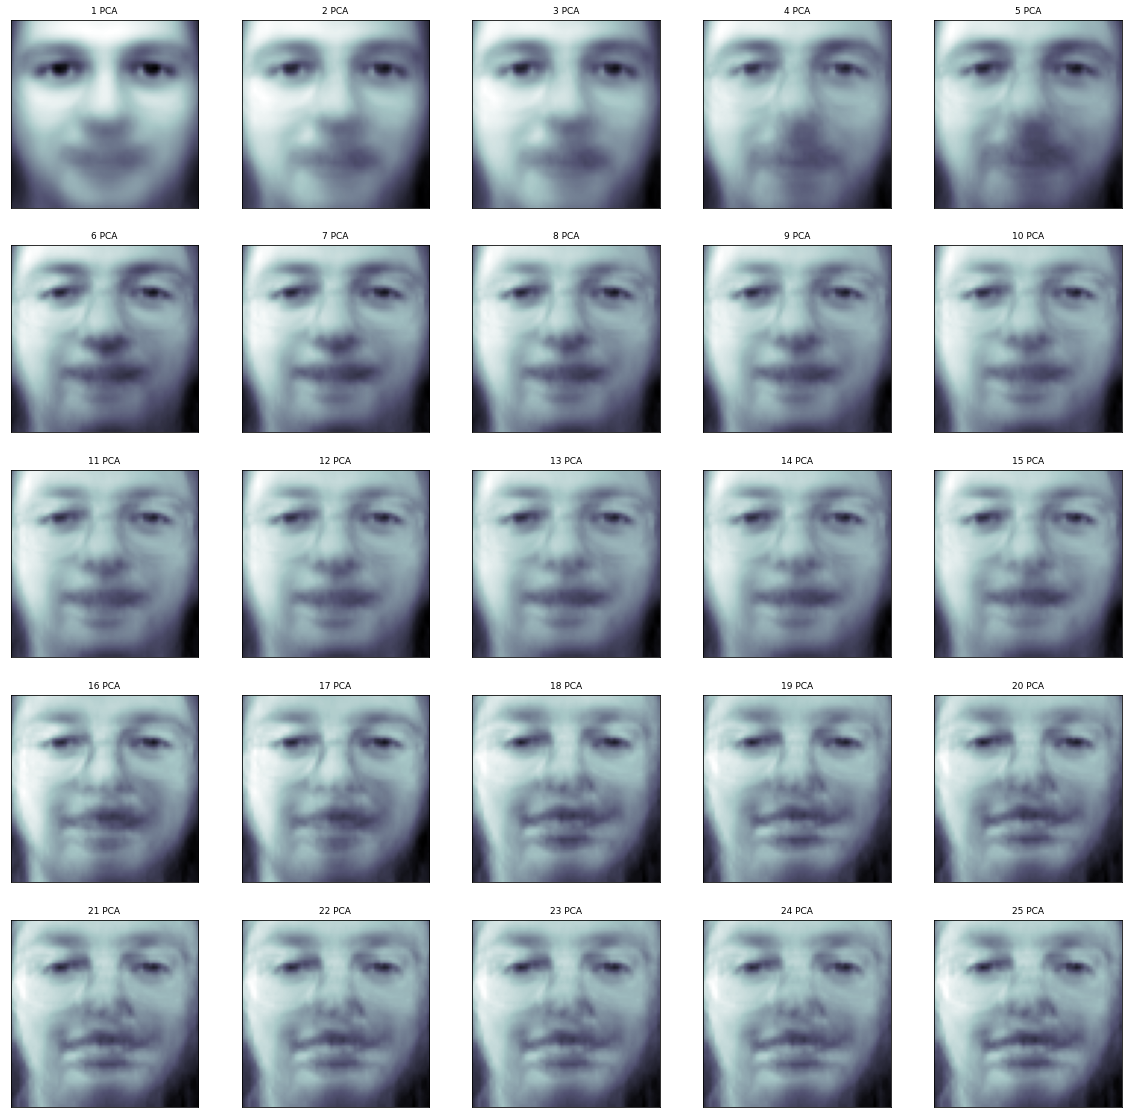

In [72]:
## Plotting reconstruction
fig = plt.figure(figsize = (20, 20))

K = 25

for comp in range(1, K + 1):
    ax = fig.add_subplot(5, 5, comp, xticks = [], yticks  = [])
    pca = PCA(n_components = comp)
    transformed_data = pca.fit_transform(X)
    x_approx = pca.inverse_transform(transformed_data)
    x_approx_img = x_approx.reshape(400, 64, 64)
    i = image_list[1]
    ax.imshow(x_approx_img[i] , cmap = plt.cm.bone)
    ax.set_title("{} PCA".format(comp), size = 9)

### 50-Dimensional Reconstruction
This section uses 50 principal components to generate a 50-dimensional reconstruction of the faces.

This is a 50 dimensional reconstruction of the original 4 images 



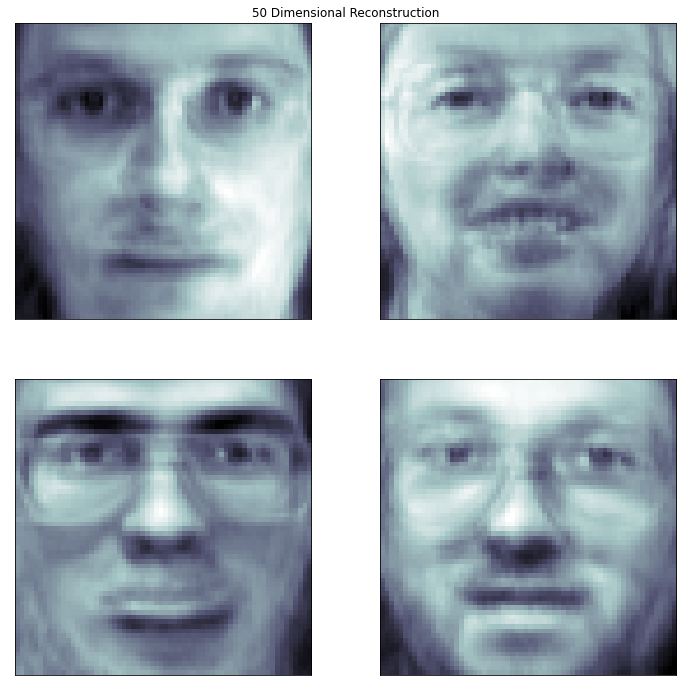

In [73]:
image_decomposition(X, 50)

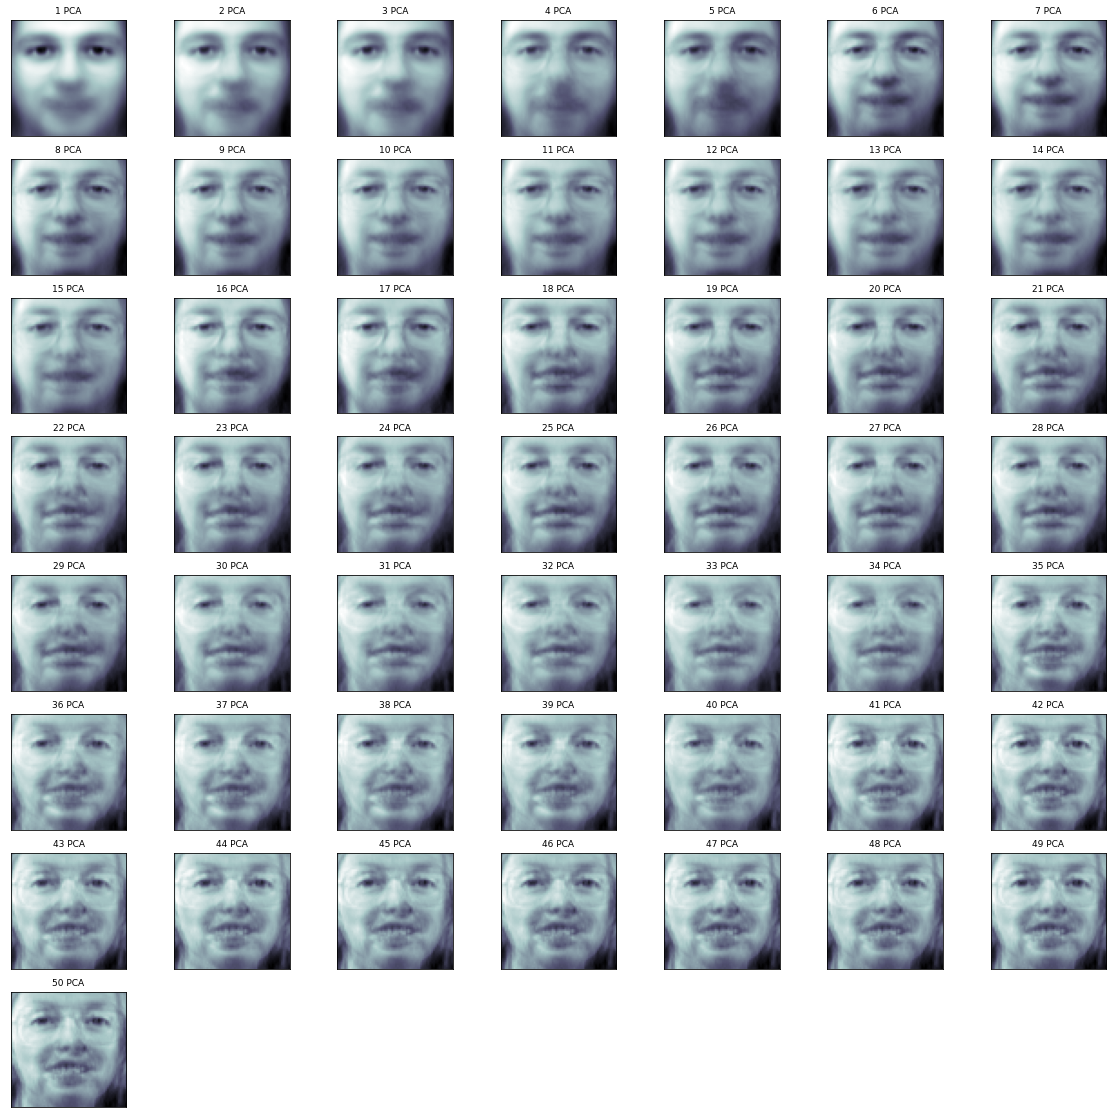

In [74]:
## Plotting reconstruction
fig = plt.figure(figsize = (20, 20))

K = 50

for comp in range(1, K + 1):
    ax = fig.add_subplot(8, 7, comp, xticks = [], yticks  = [])
    pca = PCA(n_components = comp)
    transformed_data = pca.fit_transform(X)
    x_approx = pca.inverse_transform(transformed_data)
    x_approx_img = x_approx.reshape(400, 64, 64)
    i = image_list[1]
    ax.imshow(x_approx_img[i] , cmap = plt.cm.bone)
    ax.set_title("{} PCA".format(comp), size = 9)

### 200-Dimensional Reconstruction
This section uses 200 principal components to generate a 200-dimensional reconstruction of the faces.

This is a 200 dimensional reconstruction of the original 4 images 



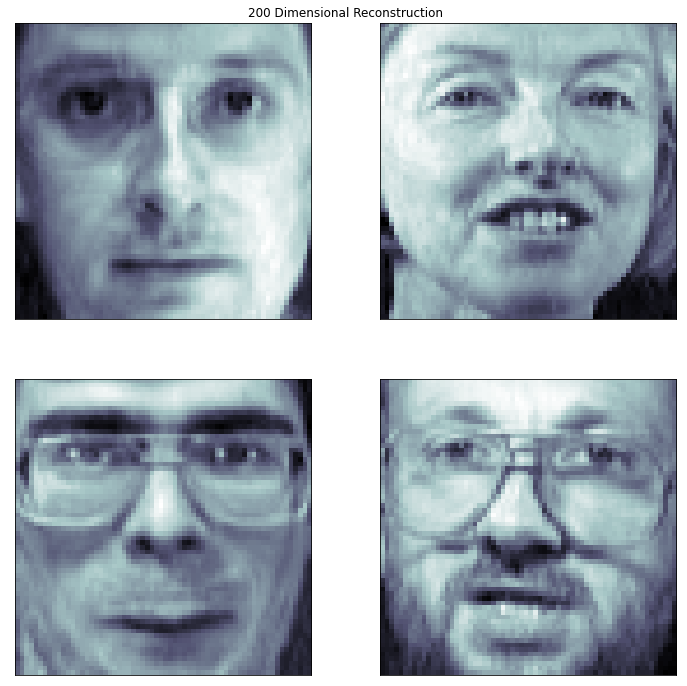

In [75]:
image_decomposition(X, 200)

As more and more principal components are used to load and display the faces, the more clear, sharp and distinguishable the faces get. This is because each additional principal components adds to the explained variance. Remarkably, it doesn't take many eigenfaces combined together (PCA components) to achieve a fair approximation of the faces. 

The technique used in creating eigenfaces and using them for recognition is also used outside of face recognition: handwriting recognition, lip reading, voice recognition, sign language/hand gestures interpretation and medical imaging analysis.

### Mathematical Expression

What is shown above can be summarized, analytically, in two reverse steps which involve scaling and rescaling the original sample. In the first one the principal components are calculated using the matrix of eigen-vectors and scaling the original data:

$$p_i=Γ^⊤\frac{(x_i−\mu)}{\sigma}$$

where $\mu$ and $\sigma$ are respectively the vectors of means and standard deviations of the variables and vector $x_i$ represents the $i^th$ image. In the second step, a reduced in component vector $\hat{x}$ is calculated and rescaled to the original size:

$$x_i≈x_i^=Γ_1:kp1:k \sigma+\mu$$

## Machine Learning for Facial Recognition
Labeled Faces in the Wild is a public benchmark for face verification, also known as pair matching. This database is of face photographs designed for studying the problem of unconstrained face recognition. The data set contains more than 13,000 images of faces collected from the web. Each face has been labeled with the name of the person pictured. 1680 of the people pictured have two or more distinct photos in the data set. 

This section will load the faces for people who have (at a minimum) 100 photos of them in the data set. PCA will be computed and from there various machine learning models will be trained and fitted. Hyperparameters for each model will be selected through GridSearchCross-Validation. This will allow for the best evaluated model from each model type (Logistic Regression, Gaussian Naive Bayes) to advance to a further model selection step involving leave-one-out cross-validation. This process will re-filter and output the absolute best model studied based on performance on the training and loo set. Finally, this champion model will be fitted and used to predict on the test set. The results will be presented through an accuracy metric and a confusion matrix before visualizing some of the faces in the data set along with the models name prediction of those faces.


In [76]:
## Load data
from sklearn.datasets import fetch_lfw_people

lfw_dataset = fetch_lfw_people(min_faces_per_person = 100)

In [77]:
_, h, w = lfw_dataset['images'].shape
X = lfw_dataset['data']
y = lfw_dataset['target']
target_names = lfw_dataset['target_names']

print(f'There are {len(X)} images in the dataset. Each image is {h} pixels by {w} pixels big.')

There are 1140 images in the dataset. Each image is 62 pixels by 47 pixels big.


This section will train and fit various machine learning models to the data in order to be able to predict the person (Colin Powell (Former United States National Security Advisor), Donald Rumsfeld (Former U.S. Congressman), George W Bush (43rd U.S. President), Gerhard Schroeder (Former Chancellor of Germany), Tony Blair (Former Prime Minister of the United Kingdom)) in the image having utilized PCA on the data.

In [78]:
## Train_Test_Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [79]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)

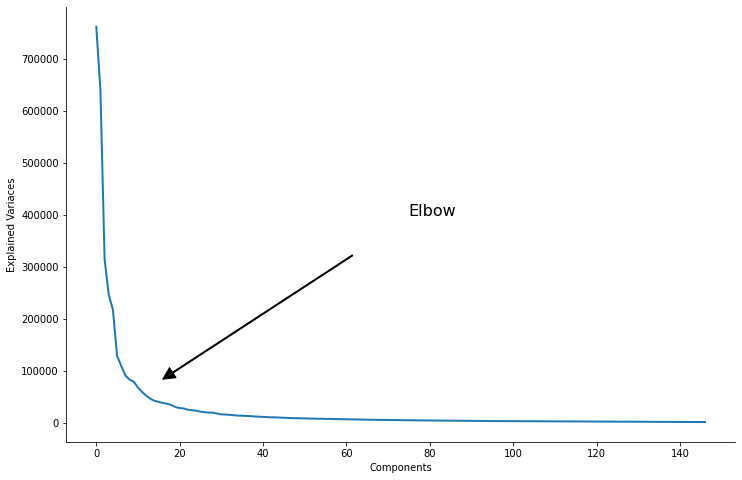

In [80]:
## Plotting
plt.figure(figsize = (12, 8))
plt.plot(pca.explained_variance_, linewidth = 2, color = '#1f78b4')
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.annotate(
    'Elbow', xy = (3, pca.explained_variance_[30]), xytext = (0.55, 0.55), textcoords = 'figure fraction', fontsize = 16,
    arrowprops = dict(facecolor = 'black', shrink = 0.18, width = 1)
             )
plt.show()

By looking at the plot the elbow can be determined. This references a point in which adding more and more PC produces a smaller change in explained variance. This can help determine (visually) how many components to introduce into the PCA model. The more components added, the clearer and more information can be explained, however with larger datasets containing many images more components will lead to longer model run times.

In [81]:
## Compute PCA
n_components = 25
pca = PCA(n_components = n_components, whiten = True).fit(X_train)

## Apply PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### Model Hyperparameter Optimization
The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data. This section utilizes grid search which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. The grid search will be guided by some performance metric, and measured by cross-validation on the training set.

#### Linear Discriminant Analysis (LDA)
A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule. The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix. The Linear Discriminant Analysis estimates the probability that a new set of inputs belongs to every class. The output class is the one that has the highest probability.

In [82]:
%%time
## Import grid search
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

## LDA hypertunning
lda = LinearDiscriminantAnalysis()
parameters = {
     "solver"           : ['svd', 'lsqr', 'eigen']
     }

grid = GridSearchCV(lda,
                    parameters, n_jobs = -1,
                    scoring = "recall_macro", cv = 5)

grid_results = grid.fit(X_train_pca, y_train)
best_lda = grid_results.best_estimator_
grid_results.best_params_

Wall time: 46.9 ms


{'solver': 'svd'}

#### Quadratic Discriminant Analysis (QDA)
Quadratic discriminant analysis (QDA) is closely related to linear discriminant analysis (LDA), where it is assumed that the measurements from each class are normally distributed. Unlike LDA however, in QDA there is no assumption that the covariance of each of the classes is identical. When the normality assumption is true, the best possible test for the hypothesis that a given measurement is from a given class is the likelihood ratio test.

In [83]:
%%time
## QDA hypertunning
qda = QuadraticDiscriminantAnalysis()
parameters = {}

grid = GridSearchCV(qda,
                    parameters, n_jobs = -1,
                    scoring = "recall_macro", cv = 5)

grid_results = grid.fit(X_train_pca, y_train)
best_qda = grid_results.best_estimator_
grid_results.best_params_

Wall time: 20.9 ms


{}

#### Logistic Regression
Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

In [84]:
%%time
## Logistic Regression hypertunning
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

parameters = [
    {"penalty" : ['l1'], 'solver' : ['liblinear', 'saga'], 'C' : [0.001, 0.01, 0.1, 1, 1.1], 'fit_intercept' : [True, False],
    'random_state' : [42], 'n_jobs' : [-1]}
    ]

grid = GridSearchCV(lr,
                    parameters, n_jobs = -1,
                    scoring = "recall_macro", cv = 5)

grid_results = grid.fit(X_train_pca, y_train)
best_lr = grid_results.best_estimator_
grid_results.best_params_

Wall time: 1.54 s


{'C': 1.1,
 'fit_intercept': False,
 'n_jobs': -1,
 'penalty': 'l1',
 'random_state': 42,
 'solver': 'liblinear'}

#### Gaussian Naive Bayes
Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and reliable algorithm. Naive Bayes classifiers have high accuracy and speed on large datasets. This assumption simplifies computation, and that's why it is considered as naive. This assumption is called class conditional independence. Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. Gaussian Naive Bayes is an algorithm having a Probabilistic Approach. It involves prior and posterior probability calculation of the classes in the dataset and the test data given a class respectively.

In [85]:
%%time
## Gaussian Naive Bayes hypertunning
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
parameters = {}

grid = GridSearchCV(nb,
                    parameters, n_jobs = -1,
                    scoring = "recall_macro", cv = 5)

grid_results = grid.fit(X_train_pca, y_train)
best_nb = grid_results.best_estimator_
grid_results.best_params_

Wall time: 15 ms


{}

#### KNearestNeighbours
In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression. 

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [86]:
%%time
## KNearestNeighbours Hypertunning
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

parameters = {
     "n_neighbors"      : range(1, 20) ,
     "weights"          : ['uniform', 'distance'],
     "algorithm"        : ['auto', 'ball_tree', 'kd_tree', 'brute'],
     "leaf_size"        : [1, 3, 5, 7, 10, 15, 20, 25, 30, 35, 40, 45, 50],
     "p"                : [1, 2],
     'n_jobs'           : [-1],
     'metric'           : ['euclidean', 'manhattan']
     }

grid = GridSearchCV(knn,
                    parameters, n_jobs=-1,
                    scoring="recall_macro")

grid_results = grid.fit(X_train_pca, y_train)
best_knn = grid_results.best_estimator_
grid_results.best_params_

Wall time: 3min 54s


{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'manhattan',
 'n_jobs': -1,
 'n_neighbors': 6,
 'p': 1,
 'weights': 'distance'}

#### Decision Tree Classifier
A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making.

In [87]:
%%time
## Decision Tree Classifier Hypertunning
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters =  [
        {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [1, 5, 10, 25, 50, 100], 
        'max_features': ['auto','sqrt', 'log2'], 'random_state': [42]}
    ]

grid = GridSearchCV(dtc, parameters, n_jobs = -1, scoring = "recall_macro", cv = 5)

grid_results = grid.fit(X_train_pca, y_train)
best_dtc = grid_results.best_estimator_
grid_results.best_params_

Wall time: 2.24 s


{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'random_state': 42,
 'splitter': 'best'}

#### C-Support Vector Classification
In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

A SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

In [88]:
%%time
## C-Support Vector Classification Hypertunning
from sklearn.svm import SVC

svc = SVC()
parameters = {
    'C'         : [1, 5, 10, 25, 50, 75, 100],
    'gamma'     : ['auto', 'scale'], 
    'kernel'    : ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree'    : [1, 2, 3, 4, 5, 6]
    }

grid = GridSearchCV(svc,
                    parameters, n_jobs = -1,
                    scoring = "recall_macro", cv = 5)

grid_results = grid.fit(X_train_pca, y_train)
best_svc = grid_results.best_estimator_
grid_results.best_params_

Wall time: 3min 22s


{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}

#### Stochastic Gradient Descent Classifier
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Strictly speaking, SGD is merely an optimization technique and does not correspond to a specific family of machine learning models. It is only a way to train a model. Often, an instance of SGDClassifier or SGDRegressor will have an equivalent estimator in the scikit-learn API, potentially using a different optimization technique. For example, using SGDClassifier(loss='log') results in logistic regression. The class SGDClassifier implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties for classification. 

In [89]:
%%time
## Stochastic Gradient Descent Classifier Hypertunning
from sklearn.linear_model.stochastic_gradient import SGDClassifier

sgd = SGDClassifier()
parameters = {
    'loss': ['hinge', 'log', 'perceptron'], 
    'penalty': ['l2', 'l1', 'elasticnet'], 
    'n_jobs' : [-1], 
    'random_state' : [42]
}

grid = GridSearchCV(sgd,
                    parameters, n_jobs = -1,
                    scoring = "recall_macro", cv = 5)

grid_results = grid.fit(X_train_pca, y_train)
best_sgd = grid_results.best_estimator_
grid_results.best_params_

Wall time: 641 ms


{'loss': 'log', 'n_jobs': -1, 'penalty': 'l1', 'random_state': 42}

### Neural Networks
Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. 

In (Artificial Neural Networks) ANN implementations, the "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs. The connections are called edges. Neurons and edges typically have a weight that adjusts as learning proceeds. The weight increases or decreases the strength of the signal at a connection. Neurons may have a threshold such that a signal is sent only if the aggregate signal crosses that threshold. Typically, neurons are aggregated into layers. Different layers may perform different transformations on their inputs. Signals travel from the first layer (the input layer), to the last layer (the output layer), possibly after traversing the layers multiple times.

#### Multi-layer Perceptron Classifier
Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where  is the number of dimensions for input and  is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers.

The MLP consists of three or more layers (an input and an output layer with one or more hidden layers) of nonlinearly-activating nodes. Since MLPs are fully connected, each node in one layer connects with a certain weight {\displaystyle w_{ij}}w_{ij} to every node in the following layer.

The weighted inputs are summed and passed through an activation function, sometimes called a transfer function. An activation function is a simple mapping of summed weighted input to the output of the neuron. It is called an activation function because it governs the threshold at which the neuron is activated and strength of the output signal.

In [115]:
%%time
## MLP Hypertunning
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(100,), (1024), (50, 50, 50)],
    'activation': ['identity', 'logistic'], 
    'solver' : ['lbfgs', 'sgd'], 
    'random_state': [42], 
    'alpha': [0.0001, 0.01, 0.1], 
    'learning_rate': ['constant','adaptive']
    }

grid = GridSearchCV(mlp,
                    parameters, n_jobs = -1,
                    scoring = "recall_macro", cv = 5)

grid_results = grid.fit(X_train_pca, y_train)
best_mlp = grid_results.best_estimator_
grid_results.best_params_    

Wall time: 3min 48s


{'activation': 'logistic',
 'alpha': 0.01,
 'hidden_layer_sizes': 1024,
 'learning_rate': 'constant',
 'random_state': 42,
 'solver': 'lbfgs'}

### Leave One Out (LOO) Cross Validation
Cross Validation, sometimes called out-of-sample testing, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent dataset. It is primarily used in settings where the goal is to predict, and one wants to estimate how accurately a predictive model will perform in practice. The idea behind cross-validation is to test the models ability to predict new data that was not used in estimating it (or training the model), in order to avoid a problem like overfitting or selection bias and to give insight on how the model will **generalize** to an independent (new/unseen) dataset. 

As is in this project, a model (or models) is being built and trained on a dataset. The fitting process completed above optimizes the models parameters to make the model fit the training data as well as possible. Once the model is shown an independent sample of the validation (unseen) data, it will generally turn out that the model does not fit and therefore performs less well on this validation set compared to the training set. The size of this difference is even more apparent if the training set is small or if the number of parameters in the model is large. Cross validation is a way to estimate the size of this effect. 

Leave-One-Out cross-validation is a special case of cross validation where the number of folds equals the number of instances in the data set. Thus, the learning algorithm is applied once for each instance, using all other instances as a training set and using the selected instance as a single-item test set. Leave-one-out cross-validation is essentially an estimate of the generalization performance of a model trained on n−1 samples of data, which tends to be a slightly pessimistic estimate of the performance of a model trained on n samples. Note however that LOOCV has a high variance (the value resulted varies a lot depending on the use of different random samples of data) which often makes it a bad choice of estimator for performance evaluation, even though it is approximately unbiased. 

Below is an illustration of leave-one-out cross-validation (LOOCV) when n = 8 observations. A total of 8 models will be trained and tested.  


<img src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c7/LOOCV.gif/300px-LOOCV.gif">  
  
  
This section will implement leave-one-out cross-validation on the training data set to each of the best models discovered above. The goal here is to find which of the best models performs the best on the loo cross-validation sets. The one with the best performance will then be selected as the chose model going forward and will be used on the test set.


In [117]:
%%time
## LOO
from sklearn.model_selection import LeaveOneOut, cross_val_score

models=[]
models.append(('LDA', best_lda))
models.append(('QDA', best_qda))
models.append(("LR", best_lr))
models.append(("NB", best_nb))
models.append(("KNN", best_knn))
models.append(("DT", best_dtc))
models.append(("SVM", best_svc))
models.append(("SGD", best_sgd))
#models.append(("MLP", best_mlp))

for name, model in models:
    loo_cv = LeaveOneOut()
    cv_scores = cross_val_score(model, X_train_pca, y_train, cv = loo_cv)
    print("{} Leave One Out cross-validation mean accuracy score: {:.3f}".format(name, 
                                                                            cv_scores.mean()))

LDA Leave One Out cross-validation mean accuracy score: 0.759
QDA Leave One Out cross-validation mean accuracy score: 0.775
LR Leave One Out cross-validation mean accuracy score: 0.735
NB Leave One Out cross-validation mean accuracy score: 0.750
KNN Leave One Out cross-validation mean accuracy score: 0.718
DT Leave One Out cross-validation mean accuracy score: 0.526
SVM Leave One Out cross-validation mean accuracy score: 0.809
SGD Leave One Out cross-validation mean accuracy score: 0.703
Wall time: 2min 57s


### Final Model: Radial Basis Function Support Vector Machine
The C-Support Vector Classification with a regularization parameter $C$ of 1, a polynomial degree of 1, a kernel coefficient of 'auto' and a radial basis function has achieved the highest leave-one-out cross-validation score out of all the models. The multi-layered perceptron follows and the quadratic discriminant analysis model ranks third. 

This section will now retrain the SVM model on all the available training data, and finally test it on the holdout (test) set. Its predictions will be visualized and its performance will again be evaluated.

In [118]:
## Model training
from sklearn.metrics import classification_report
svc = SVC(C = 1, degree = 1, gamma = 'auto', kernel = 'rbf')

svc.fit(X_train_pca, y_train)
y_pred = svc.predict(X_test_pca)

In [119]:
print(classification_report(y_test, y_pred, target_names = target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.92      0.88      0.90        50
  Donald Rumsfeld       0.89      0.64      0.74        25
    George W Bush       0.80      0.96      0.88       106
Gerhard Schroeder       0.80      0.36      0.50        22
       Tony Blair       0.76      0.76      0.76        25

         accuracy                           0.83       228
        macro avg       0.83      0.72      0.76       228
     weighted avg       0.83      0.83      0.82       228



The support is simply the number of times this ground truth label occurred in our test set, e.g., in our test set, there were actually 25 images of Tony Blair. The F1-Score is actually just computed from the precision and recall scores. Precision and recall are more specific measures than a single accuracy score. A higher value for both is better.

Below is a function used to create multi-laballed confusion matrix:

In [120]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Below is a function to shift (normalise) colormap to data:

In [125]:
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero
    
    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and 1.0.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          0.0 and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }
      
    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])
    
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
        
    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [126]:
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap = shiftedColorMap(orig_cmap, start=0, midpoint=.20, stop=1)

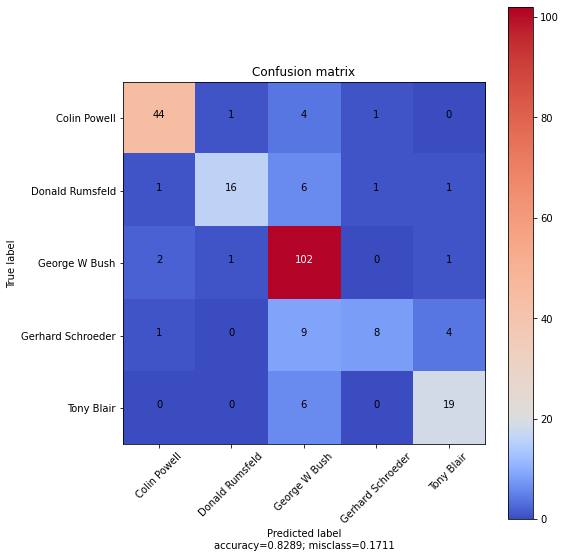

In [127]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred), target_names, cmap = shifted_cmap, normalize=False)

Looking at the confusion matrix shows how many times the model predicted each person when the true person in the image was a respective person. For example, it seems that the model did very well predicting Gerhard Schroeder (maybe because of his characteristic face?) as it predicted Gerhard 8 times correctly (predicted label = true label) and two times erroneously. Once as Colin Powell and the other as Donald Rumsfeld.

The dataset is imbalanced because there are many more instances of George W Bush (106) compared to Donald’s Rumsfled (25). The model because of this learns more about Bush features and should predict the images he appears in with more certainty than the Donald’s images simply because it sees 4 times more George W Bush data.

### Visualizing the Faces
The following sections creates a function that plots the images using along with the persons true name and the models predicted person name. Two plots are shown: 

        1) A plot with all the correct predictions
        2) A plot with all incorrect predictions
        
This is done to visualize and see what helps the model get the prediction right and so that it might be identified what features and faces cause confusion for the model.

In [128]:
## Visualization
def plot_gallery(images, titles, h, w, rows=3, cols=5):
    plt.figure(figsize = (16, 12))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
 
def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        if true_name == pred_name:
            correct = 'correct'
        else:
            correct = 'false'
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)

In [191]:
## Lists with correct predictions
correct = np.arange(len(y_test))[y_test == y_pred]

y_test_correct = list()
y_pred_correct = list()
X_test_correct = list()

for i in correct:
    y_test_correct.append(y_test[i])
    y_pred_correct.append(y_pred[i])
    X_test_correct.append(X_test[i])

y_test_correct = np.asarray(y_test_correct)
y_pred_correct = np.asarray(y_pred_correct)

This plot below shows the images the model classified correctly. The names of the predicted face are shown, the true names are also shown and finally the image is shown:

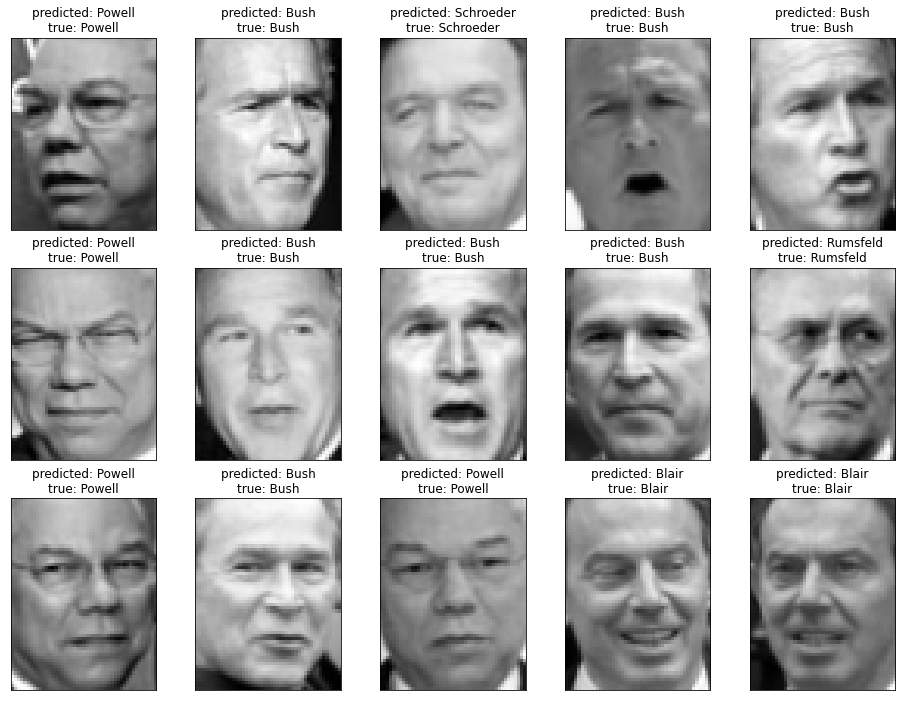

In [192]:
## Correct predictions
prediction_titles = list(titles(y_pred_correct, y_test_correct, target_names))
plot_gallery(X_test_correct, prediction_titles, h, w)

In [193]:
## Lists with incorrect predictions
wrong = np.arange(len(y_test))[y_test != y_pred]

y_test_wrong = list()
y_pred_wrong = list()
X_test_wrong = list()

for i in wrong:
    y_test_wrong.append(y_test[i])
    y_pred_wrong.append(y_pred[i])
    X_test_wrong.append(X_test[i])

y_test_wrong = np.asarray(y_test_wrong)
y_pred_wrong = np.asarray(y_pred_wrong)

This plot below shows the images the model classified incorrectly. The names of the predicted face are shown, the true names are also shown and finally the image is shown:

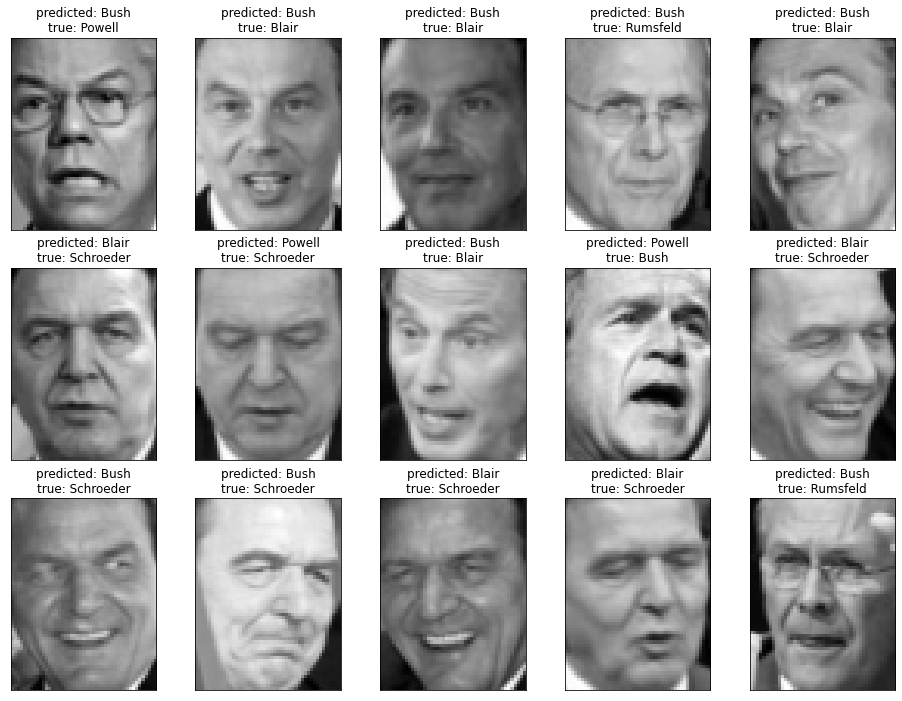

In [194]:
## Wrong predictions
prediction_titles = list(titles(y_pred_wrong, y_test_wrong, target_names))
plot_gallery(X_test_wrong, prediction_titles, h, w)

## KMeans Clustering & PCA
In this section a dataset with three different clusters will be generated (synthetically) and a 2 and 3 PCA will be actioned. From here a KMeans model will be used to cluster the original dataset, the PC's and lastly the scaled data. The model will be evaluated at each step based on its clustering prediction. 

### Simulated Dataset with 20 observations in Each of Three Classes 
This section will use scikit-learns make_blobls function to create syntheic datasets used for this project. Each cluster will have 20 variables made up of 50 features.

In [133]:
## Create the three clusters
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 60, n_features = 50, centers = 3)

In [134]:
print(f'There are {X.shape[0]} variables and {X.shape[1]} features per variable')

There are 60 variables and 50 features per variable


In [135]:
## Pandas df
data = pd.DataFrame(X)
feat_cols = ['feature' + str(i) for i in range(data.shape[1])]
data = pd.DataFrame(X, columns = feat_cols)
data['y'] = y

In [136]:
## Calculate count of each label (blob)
blob_zero = len(data.loc[data['y'] == 0]) 
blob_one = len(data.loc[data['y'] == 1]) 
blob_two =len(data.loc[data['y'] == 2]) 

print(f"There are {len(data['y'].unique())} clusters in the dataframe. There are {data.shape[0]} varaibles and"
f"the first cluster has {blob_zero} variables, the second cluster has {blob_one} clusters and the"
f"third has {blob_two} clusters")

There are 3 clusters in the dataframe. There are 60 varaibles andthe first cluster has 20 variables, the second cluster has 20 clusters and thethird has 20 clusters


In [137]:
## Dataframe
data.head()

feature0  feature1  feature2  feature3  feature4  feature5  feature6  \
0  3.925817  4.035784 -7.135602 -5.370213 -4.172426 -1.076146  3.288404   
1  0.303156  6.849411  7.241374  6.964442 -1.316256  1.902109 -4.159821   
2  6.398454  4.184949 -5.701720 -5.845597 -5.233800 -3.506301  2.154855   
3  1.583200 -4.965017 -2.797781  7.947116  8.672402  1.566603 -4.251266   
4  1.022591  9.311337  7.996680  6.163357 -2.543462  4.540951 -2.858574   

   feature7  feature8  feature9  ...  feature41  feature42  feature43  \
0  5.570735 -7.796458  0.055474  ...   2.149039  -5.254955   9.123821   
1  0.193187  1.742443 -5.966799  ...   7.710768   1.641030   6.779559   
2  6.404178 -9.194085  0.134948  ...   3.973772  -5.822743  10.216610   
3 -7.755962  3.982623 -7.524429  ...  -0.668188   8.041324   1.330062   
4  1.306235 -1.026465 -8.257284  ...   6.524638   1.463509   7.624038   

   feature44  feature45  feature46  feature47  feature48  feature49  y  
0   6.135926  -2.293199   3.113261  -2.116832  -3.612490  -1.045956  1  
1  -3.975765   1.172283  -8.771182  -0.670719  -4.654542   3.003506  0  
2   6.116565  -2.060353   4.259660  -2.511289  -3.616289  -1.689774  1  
3  -0.667688   0.656213  -6.319438  -6.174628   4.917982  10.903915  2  
4  -4.948710   0.579097  -5.424494  -0.487543  -4.773202   2.818451  0  

[5 rows x 51 columns]

### Principal Component Analysis 
This section performs PCA on the 60 observations and plots the first two and three principal component score vectors. Different colors are used to indicate the observations in each of the three classes.

#### 2 Most Important Principal Components

In [138]:
## PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

In [139]:
## PCA DF
data_pca_df = pd.DataFrame(data = X_pca, columns = ['principal_component_1', 'principal_component_2'])
data_pca_df['y'] = y
data_pca_df.head()

principal_component_1  principal_component_2  y
0             -31.285555             -14.475184  1
1               1.002205              27.014167  0
2             -34.088096             -16.259252  1
3              32.628943             -14.738188  2
4              -0.744503              26.371209  0

In [140]:
data_pca_df['principal_component_2'].mean()

7.697546304067752e-16

Explained Varaince Ratio:

In [141]:
## Expalined variance ratio
print(f'Explained variance per principal component: {pca.explained_variance_ratio_}')

Explained variance per principal component: [0.63279432 0.32679457]


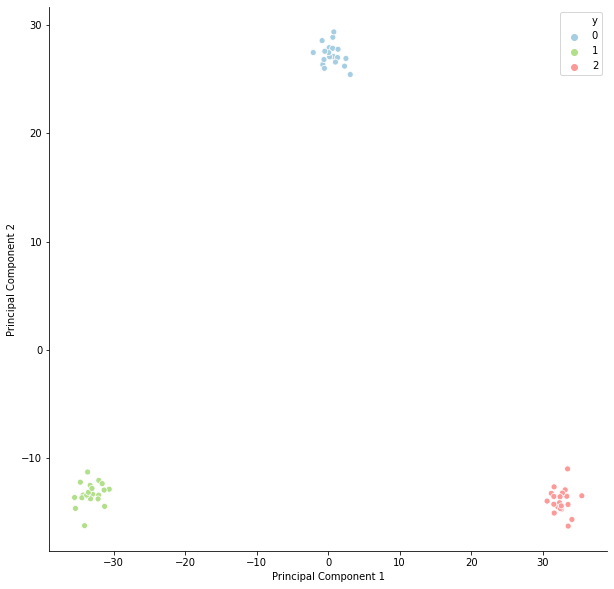

In [142]:
## Plotting the PCA components and clusters by color
import seaborn as sns
colors = ['#a6cee3', '#b2df8a', '#fb9a99']

plt.figure(figsize = (10,10))
sns.scatterplot(
    x = 'principal_component_1', y = 'principal_component_2', hue = 'y', palette = sns.color_palette(colors),
    data = data_pca_df, legend = 'full')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### 3 Most Important Principal Components

In [143]:
pca_3 = PCA(n_components = 3)
X_pca_3 = pca_3.fit_transform(X)

In [144]:
## PCA 3 DF
data_pca_3_df = pd.DataFrame(data = X_pca_3, columns = ['principal_component_1', 
                                                        'principal_component_2', 'principal_component_3'])
data_pca_3_df.tail()

principal_component_1  principal_component_2  principal_component_3
55             -31.347238             -12.967090              -1.922212
56             -32.194395             -13.786392               1.734900
57             -31.622805             -12.370877              -2.868685
58              32.452542             -13.581015               2.592836
59              31.634919             -15.089002               0.069853

In [145]:
data_pca_3_df['y'] = y
data_pca_3_df.tail()

principal_component_1  principal_component_2  principal_component_3  y
55             -31.347238             -12.967090              -1.922212  1
56             -32.194395             -13.786392               1.734900  1
57             -31.622805             -12.370877              -2.868685  1
58              32.452542             -13.581015               2.592836  2
59              31.634919             -15.089002               0.069853  2

In [146]:
## Expalined variance ratio
print(f'Explained variance per principal component: {pca_3.explained_variance_ratio_}')

Explained variance per principal component: [0.63279432 0.32679457 0.00309634]


In [147]:
my_color = data_pca_3_df['y']

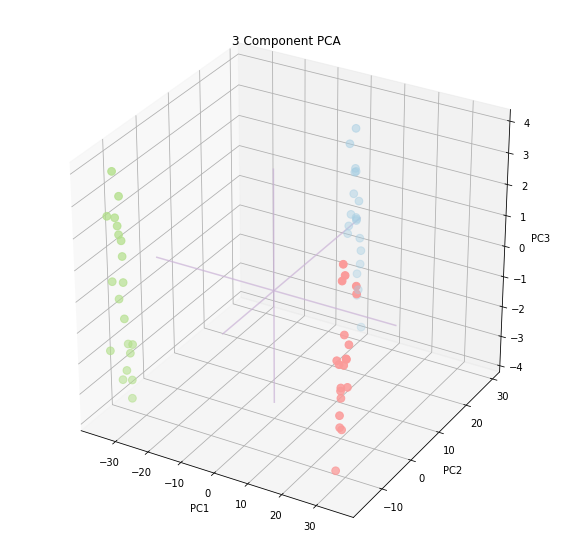

In [148]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.color_palette(colors).as_hex())


fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data_pca_3_df['principal_component_1'], data_pca_3_df['principal_component_2'], 
           data_pca_3_df['principal_component_3'], 
c = my_color, cmap = my_cmap, s = 60)

# make simple, bare axis lines through space:
xAxisLine = ((min(data_pca_3_df['principal_component_1']), max(data_pca_3_df['principal_component_1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], '#cab2d6', alpha = 0.7)
yAxisLine = ((0, 0), (min(data_pca_3_df['principal_component_2']), max(data_pca_3_df['principal_component_2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], '#cab2d6', alpha = 0.7)
zAxisLine = ((0, 0), (0,0), (min(data_pca_3_df['principal_component_3']), max(data_pca_3_df['principal_component_3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], '#cab2d6', alpha = 0.7)

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3 Component PCA")

plt.show()

### KMeans Clustering: $K=3$
This section performs K-means clustering of the observations with $K = 3$. The accuracy of these cluster predictions are calculated as well and visualized with a confusion matrix in order to evaluate the models performance.

In [149]:
## Import and load KMeans
from sklearn.cluster import KMeans
k = 3

kmeans = KMeans(n_clusters = k, random_state = 42)
clusters = kmeans.fit_predict(X)

In [150]:
print(f'The algorithm found the following 3 centroids')
kmeans.cluster_centers_

The algorithm found the following 3 centroids


array([[ 7.34909242,  4.28313245, -4.91420454, -5.48914885, -4.40889729,
        -1.71231993,  3.75805595,  6.36100893, -8.48384585,  0.33811957,
        -3.47693832, -0.76447362, -9.69535039, -9.40722373,  1.89221235,
         7.39909941,  0.10492983, -4.32499174, -9.58936946, -1.26137255,
        -7.07363267, -8.35100721, -4.60867638, -2.15818082,  0.83772365,
         5.2130651 , -1.84741121,  1.14449904, -2.55265817, -0.56819924,
         5.48842124, -8.16453851, -5.84679156,  3.70132077,  8.35214   ,
         0.67631606, -7.50045485, -6.17429535,  5.27255792, 10.00189755,
        -0.08031903,  3.44087253, -5.75258465,  9.65953472,  5.65696448,
        -1.92727656,  4.08286836, -2.89267525, -5.12393917, -0.98848109],
       [ 0.99051176, -4.26796584, -3.24693016,  5.59254591,  6.39981989,
         1.05656721, -3.73123673, -6.94073185,  5.05437214, -6.95651231,
        -6.95656301,  7.16820859, -3.14029229,  6.20095621,  9.34763025,
        -4.69451538, -0.01727897, -1.28945768,  5.

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below).

The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum-of-squares criterion. Inertia can be recognized as a measure of how internally coherent clusters are. However, it suffers from two main drawbacks:

    Inertia makes the assumption that clusters are convex and isotropic. It responds poorly to elongated clusters, 
    or manifolds with irregular shapes. This is not the case in this example, as clusters observed in the 2D plot 
    are not of irregular shapes

    Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very 
    high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called 
    “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal Component Analysis 
    (PCA), as has been done above, prior to k-means clustering can alleviate this problem and speed up the computations.

In [151]:
print(f'With a K values of {k} the models intertia is {kmeans.inertia_}')

With a K values of 3 the models intertia is 2924.1666094678394


In [152]:
## Inertias for varying K's
kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

k = 1
for inertia in inertias:
    print(f'With a K values of {k} the models intertia is {inertia}')
    k += 1

With a K values of 1 the models intertia is 68556.27952146133
With a K values of 2 the models intertia is 30249.88736004541
With a K values of 3 the models intertia is 2924.1666094678394
With a K values of 4 the models intertia is 2817.413477485729
With a K values of 5 the models intertia is 2738.520688362558
With a K values of 6 the models intertia is 2663.835119083083
With a K values of 7 the models intertia is 2579.4519822869333
With a K values of 8 the models intertia is 2492.2693821812836
With a K values of 9 the models intertia is 2444.686162202957


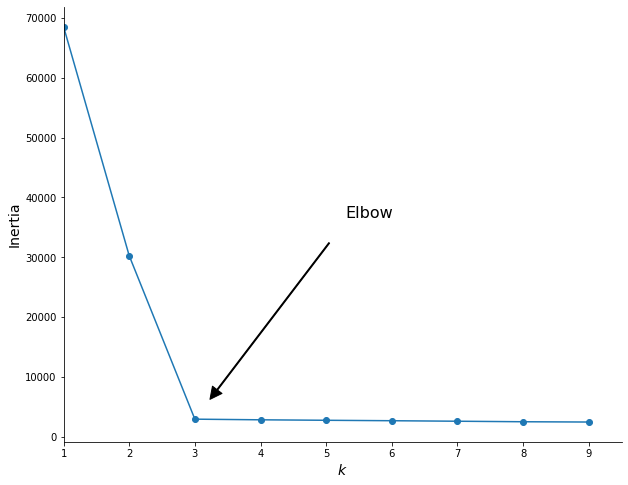

In [153]:
## Plotting
plt.figure(figsize = (10, 8))
plt.plot(range(1, 10), inertias, "bo-", color = '#1f78b4')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate(
    'Elbow', xy = (3, inertias[2]), xytext = (0.55, 0.55), textcoords = 'figure fraction', fontsize = 16,
    arrowprops = dict(facecolor = 'black', shrink = 0.1, width = 1)
             )
plt.xlim([1, 9.5])
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.show()

Because k-means knows nothing about the identity of the cluster, the 0, 1 and 2 labels may be permuted. This can be fixed by matching each learned cluster label with the true labels found in them

In [154]:
## Testing for model accuracy
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(data_pca_df['y'][mask])[0]

Now the preformance (accuracy) of the unsupervised clustering in finding similar clusters within the data can be checked

In [155]:
from sklearn.metrics import accuracy_score
accuracy_score(data_pca_df['y'], labels)

1.0

The confusion matrix may be used to visualise the classifications made by the KMeans model

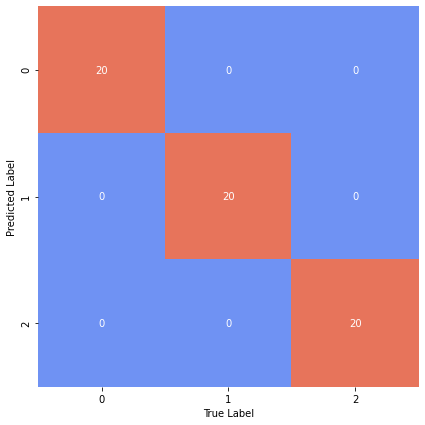

In [156]:
## Confusion Matrix plot
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (7, 7))
mat = confusion_matrix(data_pca_df['y'], labels)
sns.heatmap(
    mat.T, square = True, cbar = False, annot = True, fmt = 'd', xticklabels = [0, 1, 2], 
    yticklabels = [0, 1, 2], cmap='coolwarm', 
    vmin = -5, vmax = 25)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

At $k = 3$ K-Means has perfectly classified the data. The confusion matrix solidifies this logic showing that there are no incorrecty label data points

### KMeans Clustering: $K=2$
This section performs K-means clustering of the observations with $K = 2$. The accuracy of these cluster predictions are calculated as well and visualised with a confusion matrix in order to evaluate the models perfomance.

In [157]:
from sklearn.cluster import KMeans
k = 2

kmeans = KMeans(n_clusters = k)
clusters = kmeans.fit_predict(X)

In [158]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(data_pca_df['y'][mask])[0]

In [159]:
from sklearn.metrics import accuracy_score
accuracy_score(data_pca_df['y'], labels)

0.6666666666666666

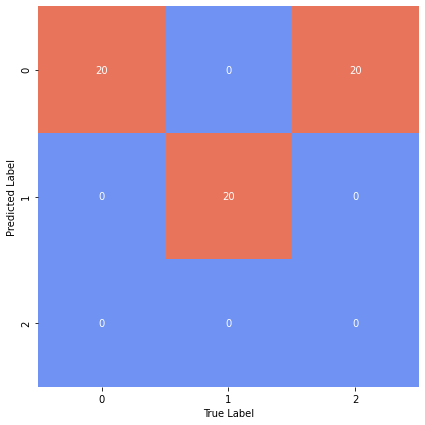

In [160]:
## Confusion Matrix plot
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (7, 7))
mat = confusion_matrix(data_pca_df['y'], labels)
sns.heatmap(
    mat.T, square = True, cbar = False, annot = True, fmt = 'd', xticklabels = [0, 1, 2], 
    yticklabels = [0, 1, 2], cmap='coolwarm', 
    vmin = -5, vmax = 25)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

### KMeans Clustering: $K=4$
This section performs K-means clustering of the observations with $K = 4$. The accuracy of these cluster predictions are calculated as well and visualised with a confusion matrix in order to evaluate the models perfomance.

In [161]:
from sklearn.cluster import KMeans
k = 4

kmeans = KMeans(n_clusters = k)
clusters = kmeans.fit_predict(X)

In [162]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(4):
    mask = (clusters == i)
    labels[mask] = mode(data_pca_df['y'][mask])[0]

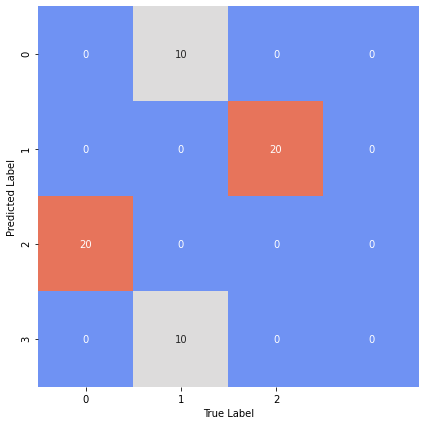

In [163]:
## Confusion Matrix plot
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (7, 7))
mat = confusion_matrix(data_pca_df['y'], clusters)
sns.heatmap(
    mat.T, square = True, cbar = False, annot = True, fmt = 'd', xticklabels = [0, 1, 2], 
    yticklabels = [0, 1, 2, 3], cmap='coolwarm', 
    vmin = -5, vmax = 25)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

### KMeans Clustering on 2 Component PCA: $K=3$
This section performs K-means clustering of on the the first two principal component score vectors with $K = 3$. The accuracy of these cluster predictions are calculated as well and visualised with a confusion matrix in order to evaluate the models perfomance.

In [164]:
## Import and load KMeans
from sklearn.cluster import KMeans
k = 3

kmeans = KMeans(n_clusters = k, random_state = 42)
clusters = kmeans.fit_predict(X_pca)

In [165]:
print(f'The algorithm found the following 3 centroids')
kmeans.cluster_centers_

The algorithm found the following 3 centroids


array([[-33.16043459, -13.3139999 ],
       [ 32.62983135, -13.97187862],
       [  0.53060323,  27.28587853]])

In [166]:
print(f'With a K values of {k} the models intertia is {kmeans.inertia_}')

With a K values of 3 the models intertia is 153.90423170318454


In [167]:
## Inertias for varying K's
kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(X_pca) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

k = 1
for inertia in inertias:
    print(f'With a K values of {k} the models intertia is {inertia}')
    k += 1

With a K values of 1 the models intertia is 65785.84439622595
With a K values of 2 the models intertia is 27479.533938370336
With a K values of 3 the models intertia is 153.90423170318454
With a K values of 4 the models intertia is 127.7880721015292
With a K values of 5 the models intertia is 107.47707693257095
With a K values of 6 the models intertia is 91.37865597665774
With a K values of 7 the models intertia is 80.184413324063
With a K values of 8 the models intertia is 67.28751952907453
With a K values of 9 the models intertia is 59.85818485098013


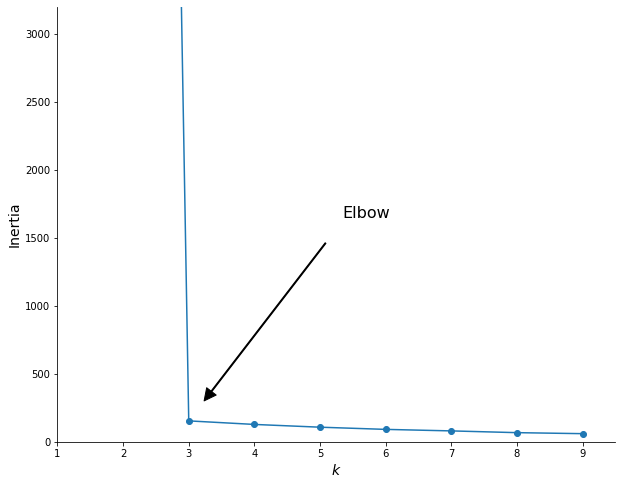

In [168]:
## Plotting
plt.figure(figsize = (10, 8))
plt.plot(range(1, 10), inertias, "bo-", color = '#1f78b4')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate(
    'Elbow', xy = (3, inertias[2]), xytext = (0.55, 0.55), textcoords = 'figure fraction', fontsize = 16,
    arrowprops = dict(facecolor = 'black', shrink = 0.1, width = 1)
             )
plt.axis([1, 9.5, 0, 3200])
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.show()

In [169]:
## Testing for model accuracy
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(data_pca_df['y'][mask])[0]

In [170]:
from sklearn.metrics import accuracy_score
accuracy_score(data_pca_df['y'], labels)

1.0

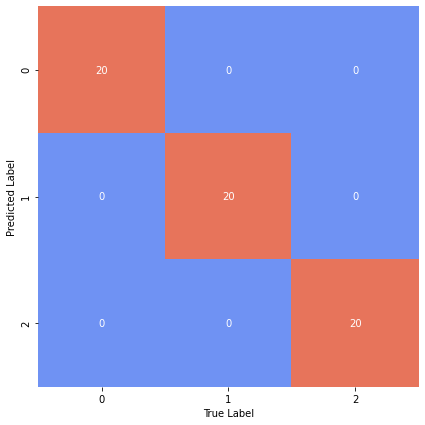

In [171]:
## Confusion Matrix plot
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (7, 7))
mat = confusion_matrix(data_pca_df['y'], labels)
sns.heatmap(
    mat.T, square = True, cbar = False, annot = True, fmt = 'd', xticklabels = [0, 1, 2], 
    yticklabels = [0, 1, 2], cmap='coolwarm', 
    vmin = -5, vmax = 25)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

#### Visualizing the Clusters, Centroids and Boundaries
Because the KMeans clustering has been completed on 2 principal components (features) the data can be visualized in 2 dimensional space.


In [172]:
## Function used to plot data, centroids and decision boundries (HOML)
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True, ax=ax):
    mins = X.min(axis=0) - 10
    maxs = X.max(axis=0) + 10
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

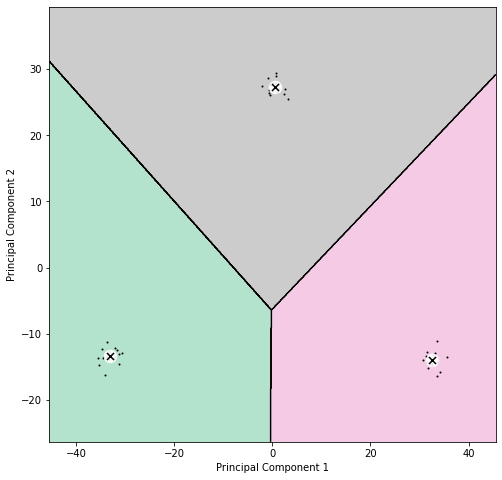

In [173]:
## Plot
plt.figure(figsize = (8, 8))
plot_decision_boundaries(kmeans, X_pca)

plt.xlabel('Principal Component 1', size = 10)
plt.ylabel('Principal Component 2', rotation = 90,  size = 10)
plt.show()

A plot showing the clusters, decision boundaries and centroids is shown below for varying KMeans $K$ clusters. This is created to show that having more clusters (granular) segmentation is not always desirable. Eventually it comes to a point, in this case at $k = 3$, where adding more clusters is counterproductive. At $k = 3$, the data is clustered perfectly and sits centered in their respective decision boundary.  At $k = 4$, it can be seen that the bottom left data cluster has been divided in two. Visually this doesn't seem to make much sense. It gets even more split as the value for clusters continues to increase to 6.

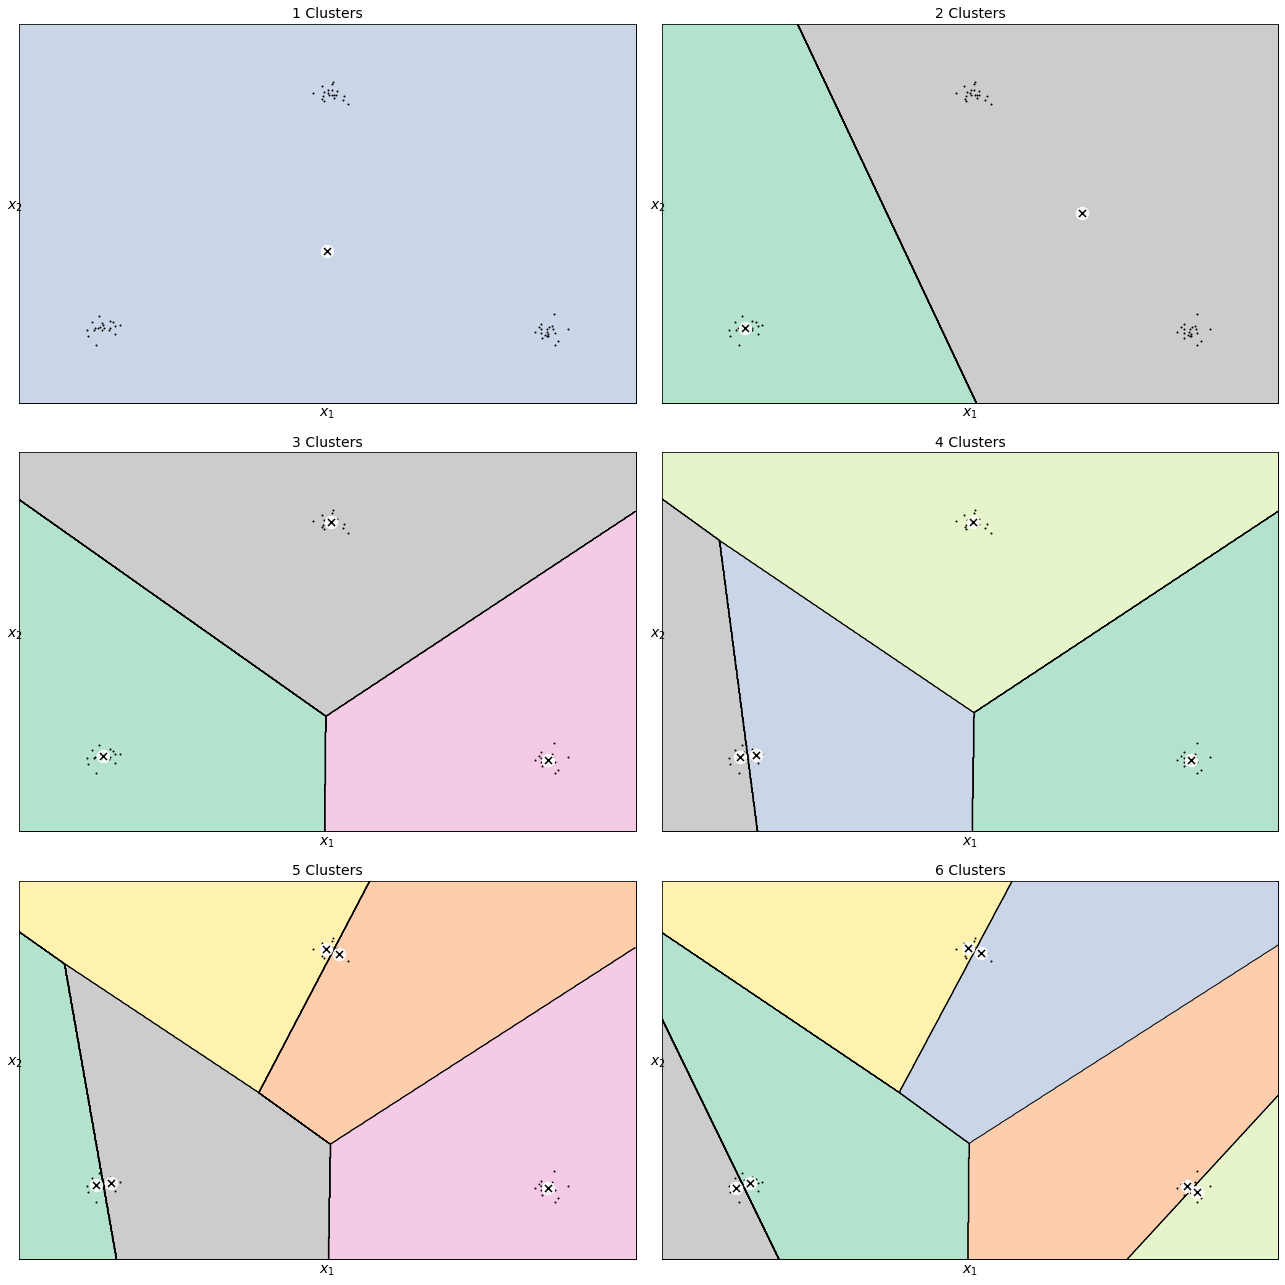

In [174]:
## Decision Boundries for PCA
ks = [1, 2, 3, 4, 5, 6]
nums = [1, 2, 3, 4, 5, 6]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (18, 18), sharex=True, sharey=True)

for ax, k, num in zip(axes.flatten(), ks, nums):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    clusters = kmeans.fit_predict(X_pca)
    ax = fig.add_subplot(3,2, num)
    ax.set_title(f'{k} Clusters', size = 14)
    plot_decision_boundaries(kmeans, X_pca)  
    plt.xticks([])
    plt.yticks([])
    
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
      
plt.tight_layout()    
plt.show()

### KMeans Clustering on Scaled Data: $K=3$
The data must be standardized as KMeans outputs are influenced on the scale of the feature data. This section scales the data and apply $K=3$ KMeans clustering to that data.

In [175]:
## Standardize X
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [176]:
## Shape should be the same
print(X.shape)

(60, 50)


In [177]:
## Distribution 
print(f'The mean of the standardized data is {np.mean(X)} and its standard deviation is {np.std(X)}')

The mean of the standardized data is -2.3684757858670005e-18 and its standard deviation is 1.0


In [178]:
## Create df
feat_cols = ['feature' + str(i) for i in range(X.shape[1])]
normalised_data = pd.DataFrame(X, columns = feat_cols)
normalised_data['y'] = y

In [179]:
normalised_data.head()

feature0  feature1  feature2  feature3  feature4  feature5  feature6  \
0  0.267985  0.324296 -1.267102 -1.370090 -0.808962 -0.865103  1.196088   
1 -0.863076  0.889979  1.469354  0.943015 -0.219835  0.427668 -0.975577   
2  1.039988  0.354286 -0.994183 -1.459238 -1.027886 -1.919960  0.865581   
3 -0.463423 -1.485325 -0.441459  1.127295  1.840471  0.282035 -1.002240   
4 -0.638455  1.384951  1.613116  0.792788 -0.472965  1.573110 -0.596175   

   feature7  feature8  feature9  ...  feature41  feature42  feature43  \
0  1.063655 -1.214819  1.293335  ...  -0.470791  -1.168090   0.870878   
1  0.093488  0.432592 -0.343391  ...   1.317861   0.064712   0.273995   
2  1.214017 -1.456196  1.314934  ...   0.116043  -1.269594   1.149119   
3 -1.340623  0.819481 -0.766721  ...  -1.376812   1.208899  -1.113529   
4  0.294294 -0.045611 -0.965896  ...   0.936401   0.032976   0.489011   

   feature44  feature45  feature46  feature47  feature48  feature49  y  
0   1.433961  -1.300677   1.226812   0.262945  -0.417687  -1.131135  1  
1  -0.726389   0.977701  -0.670850   0.921490  -0.610444  -0.248035  0  
2   1.429824  -1.147593   1.409864   0.083314  -0.418390  -1.271537  1  
3  -0.019622   0.638411  -0.279365  -1.584933   1.160266   1.474872  2  
4  -0.934257   0.587711  -0.136464   1.004906  -0.632394  -0.288391  0  

[5 rows x 51 columns]

In [180]:
k = 3

kmeans = KMeans(n_clusters = k, random_state = 42)
clusters = kmeans.fit_predict(X)

In [181]:
print(f'The algorithm found the following 3 centroids')
kmeans.cluster_centers_

The algorithm found the following 3 centroids


array([[ 1.33679418,  0.37402552, -0.84429033, -1.39239403, -0.85773769,
        -1.14124704,  1.33302303,  1.20622857, -1.33353431,  1.37015171,
         1.21046562, -0.98370828, -1.35632443, -1.39703808, -0.1160935 ,
         1.35085602, -0.6378018 , -1.07394262, -1.31575906, -1.31518186,
        -1.24847868, -1.30140589, -0.43668567,  1.03928773,  1.22903821,
         1.08910657, -0.15188987, -0.77511727, -1.31452322, -0.56841819,
         1.0255807 , -1.28916305, -0.46267851,  0.64981712,  1.33081135,
        -0.03371772, -1.29938215, -0.56641666,  0.4525268 ,  0.90721861,
        -1.31266945, -0.05533747, -1.25705164,  1.00727925,  1.33163134,
        -1.06010177,  1.381635  , -0.09036582, -0.69727256, -1.11860044],
       [-0.64847084, -1.34518188, -0.52694793,  0.68574462,  1.37171748,
         0.06064376, -0.85061577, -1.19354682,  1.0045773 , -0.61237384,
        -0.10549431,  1.30246501,  0.6134852 ,  0.62181768,  1.26485361,
        -0.34615991, -0.68555853, -0.20101716,  1.

In [182]:
print(f'With a K values of {k} the models intertia is {kmeans.inertia_}')

With a K values of 3 the models intertia is 301.6182653884049


In [183]:
## Inertias for varying K's
kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

k = 1
for inertia in inertias:
    print(f'With a K values of {k} the models intertia is {inertia}')
    k += 1

With a K values of 1 the models intertia is 3000.0
With a K values of 2 the models intertia is 1334.5645553689988
With a K values of 3 the models intertia is 301.6182653884049
With a K values of 4 the models intertia is 277.36896411796056
With a K values of 5 the models intertia is 258.20203986384223
With a K values of 6 the models intertia is 248.9448371342515
With a K values of 7 the models intertia is 229.33898434568408
With a K values of 8 the models intertia is 220.23943055996327
With a K values of 9 the models intertia is 209.42819751707955


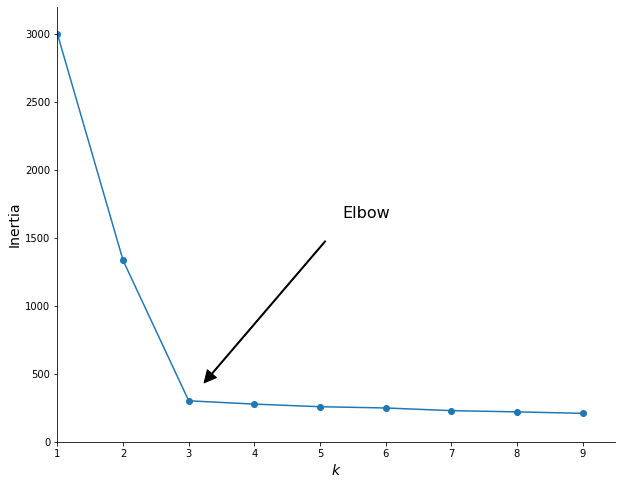

In [184]:
## Plotting
plt.figure(figsize = (10, 8))
plt.plot(range(1, 10), inertias, "bo-", color = '#1f78b4')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate(
    'Elbow', xy = (3, inertias[2]), xytext = (0.55, 0.55), textcoords = 'figure fraction', fontsize = 16,
    arrowprops = dict(facecolor = 'black', shrink = 0.1, width = 1)
             )
plt.axis([1, 9.5, 0, 3200])
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.show()

In [185]:
## Testing for model accuracy
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(data_pca_df['y'][mask])[0]

In [186]:
from sklearn.metrics import accuracy_score
accuracy_score(data_pca_df['y'], labels)

1.0

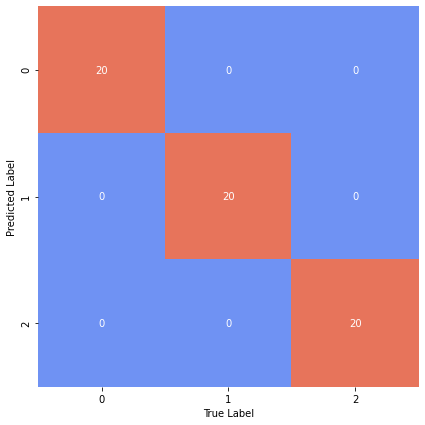

In [187]:
## Confusion Matrix plot
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (7, 7))
mat = confusion_matrix(data_pca_df['y'], labels)
sns.heatmap(
    mat.T, square = True, cbar = False, annot = True, fmt = 'd', xticklabels = [0, 1, 2], 
    yticklabels = [0, 1, 2], cmap='coolwarm', 
    vmin = -5, vmax = 25)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

Again, with $K=3$, K-means algorithm perfectly classifies the data.

Even though PCA is not a classifier, but an orthogonal representation of data, the results are linked to the 2Dimensional visualization of the colored data in the PCA section where it is clearly possible to identify the three clusters just looking at the first two components. Any variance coming from one of the remaining 48 components is smaller and since the K-means algorithm tries to minimize the variance among the observations categorizes in each cluster, a PCA plot like that suggests that K-means can perform really well. Moreover, in case the number of cluster was unknown or uncertain, PCA analysis can give some information about the possible optimal $k$.


## Conclusion
This paper discussed an important and popular approach to face recognition called eigenfaces. The essence behind eigenfaces is an unsupervised dimensionality reduction algorithm called principal component analysis that attempts to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. It does this by making linear combinations of features in order to push all the variance in a few transformed features. 

This facial recognition technique is an extremely primitive method compared to the state of the art algorithms that are used in Face ID for mobile phone unlocking, live time facial recognition software at airports and most other commercial and all military applications. **DeepFace** deep learning facial recognition system created by a research group at Facebook. It identifies human faces in digital images. It employs a nine-layer neural network with over 120 million connection weights and was trained on four million images uploaded by Facebook users. With an accuracy of 97%, it was a major leap forward using deep learning for face recognition. The **DeepID**, or “Deep hidden IDentity features,” is a series of systems (e.g. DeepID, DeepID2, etc.), first described by Yi Sun, et al. in their 2014 paper titled “Deep Learning Face Representation from Predicting 10,000 Classes.” Their system was first described much like DeepFace, although was expanded in subsequent publications to support both identification and verification tasks by training via contrastive loss.

The aim of KMeans is to segregate groups with similar traits and assign them into clusters. The goal of the k-means algorithm is to find groups in the data, with the number of groups represented by the variable K. Its use in industry is vast and extensive. It is used as a document classification tool which cluster documents in multiple categories based on tags, topics, and the content of the document. It can be used to identify crime localities by grouping related crimes in specific localities in a city, the category of crime, the area of the crime, and the association between the two can give quality insight into crime-prone areas within a city or a locality. Gain an upper hand on fantasy sports by identifying similar players based on player stats that manually might not be seen. Image segmentation for recognition and labeling and many other methods.

## Further Reading

#### Data sets
https://scikit-learn.org/0.19/datasets/olivetti_faces.html  
http://vis-www.cs.umass.edu/lfw/  

#### PCA
https://en.wikipedia.org/wiki/Principal_component_analysis  
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html  
https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c  

#### Neural Networks
https://pathmind.com/wiki/neural-network  
https://en.wikipedia.org/wiki/Artificial_neural_network  
http://neuralnetworksanddeeplearning.com/  

#### Cross-Validation
https://en.wikipedia.org/wiki/Cross-validation_(statistics)  
https://machinelearningmastery.com/k-fold-cross-validation/  
https://link.springer.com/referenceworkentry/10.1007%2F978-0-387-30164-8_469  

#### KMeans Clustering
https://en.wikipedia.org/wiki/K-means_clustering  
https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/  
https://sites.google.com/site/dataclusteringalgorithms/k-means-clustering-algorithm  